# Airbnb in Boston



[Neighbourhood](#NEIGHBORHOOD)

[Public Transportation](#TRANSPORTATION)

[Space](#SPACE)

[Price](#PRICE)

[Other Details](#OTHER_DETAILS)



In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import seaborn as sns
import pickle
%matplotlib inline
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)

### About the Data


In [3]:
# load the data, this is the longer version with 106 columns
# listings_bos = pd.read_csv('../input/b_listings/extra/listings_201907_long.csv')
# listings_cam = pd.read_csv('../input/c_listings/extra/listings_201907_long.csv')
# listings = pd.concat([listings_bos,listings_cam],ignore_index=True)

listings = pd.read_csv('../input/b_listings/extra/listings_201907_long.csv')
listings.shape

(6264, 106)

In [49]:
# listings_bos.shape[0]

6264

In [51]:
# listings_bos.id.describe()

count    6.264000e+03
mean     2.084897e+07
std      9.885939e+06
min      3.781000e+03
25%      1.378730e+07
50%      2.172642e+07
75%      2.903044e+07
max      3.669705e+07
Name: id, dtype: float64

In [96]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(23), object(61)
memory usage: 1.1+ MB


In [97]:
listings.describe()

id     scrape_id  thumbnail_url  medium_url  xl_picture_url  \
count  1.377000e+03  1.377000e+03            0.0         0.0             0.0   
mean   1.995528e+07  2.019072e+13            NaN         NaN             NaN   
std    1.114217e+07  6.760268e-01            NaN         NaN             NaN   
min    8.521000e+03  2.019072e+13            NaN         NaN             NaN   
25%    1.035588e+07  2.019072e+13            NaN         NaN             NaN   
50%    2.075650e+07  2.019072e+13            NaN         NaN             NaN   
75%    3.038990e+07  2.019072e+13            NaN         NaN             NaN   
max    3.693575e+07  2.019072e+13            NaN         NaN             NaN   

            host_id  host_acceptance_rate  host_listings_count  \
count  1.377000e+03                   0.0          1368.000000   
mean   6.933603e+07                   NaN            41.637427   
std    7.870097e+07                   NaN           144.272167   
min    3.538400e+04                   NaN             0.000000   
25%    9.928124e+06                   NaN             1.000000   
50%    3.353454e+07                   NaN             3.000000   
75%    1.021346e+08                   NaN            11.000000   
max    2.757754e+08                   NaN           781.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                1368.000000                           0.0  1377.000000   
mean                   41.637427                           NaN    42.372002   
std                   144.272167                           NaN     0.009219   
min                     0.000000                           NaN    42.352040   
25%                     1.000000                           NaN    42.365350   
50%                     3.000000                           NaN    42.370260   
75%                    11.000000                           NaN    42.375880   
max                   781.000000                           NaN    42.401410   

         longitude  accommodates    bathrooms     bedrooms         beds  \
count  1377.000000   1377.000000  1377.000000  1377.000000  1377.000000   
mean    -71.107792      3.084967     1.274873     1.355120     1.732752   
std       0.017614      1.956849     0.520447     0.804848     1.094268   
min     -71.159640      1.000000     1.000000     0.000000     0.000000   
25%     -71.117110      2.000000     1.000000     1.000000     1.000000   
50%     -71.106350      2.000000     1.000000     1.000000     1.000000   
75%     -71.095980      4.000000     1.500000     2.000000     2.000000   
max     -71.070290     14.000000     4.500000     6.000000     8.000000   

       square_feet  guests_included  minimum_nights  maximum_nights  \
count     8.000000      1377.000000     1377.000000     1377.000000   
mean    458.125000         1.593319       13.187364      726.214234   
std     296.418352         1.256454       33.363982      580.695044   
min     105.000000         1.000000        1.000000        1.000000   
25%     176.250000         1.000000        1.000000       60.000000   
50%     502.500000         1.000000        2.000000     1125.000000   
75%     662.500000         2.000000        7.000000     1125.000000   
max     900.000000        10.000000      365.000000    11250.000000   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
count             1377.000000             1377.000000             1377.000000   
mean                12.087146               14.806100              725.690632   
std                 31.591202               36.110248              581.183156   
min                  1.000000                1.000000                1.000000   
25%                  1.000000                1.000000               60.000000   
50%                  2.000000                3.000000             1125.000000   
75%                  7.000000               14.000000             1125.000000   
max                365.00

In [129]:
listings.tail(3)

id                            listing_url       scrape_id  \
7638  36884086  https://www.airbnb.com/rooms/36884086  20190720185741   
7639  36888997  https://www.airbnb.com/rooms/36888997  20190720185741   
7640  36935753  https://www.airbnb.com/rooms/36935753  20190720185741   

     last_scraped                                            name  \
7638   2019-07-20       Kirkland Village Graduate Student Housing   
7639   2019-07-20               Charming apartment in Beacon Hill   
7640   2019-07-20  Visiting Scholars and Graduate Student Housing   

                                                summary  \
7638  This large bedroom is located in a bright and ...   
7639  You'll fall in love with this charming apartme...   
7640  This is a really nice 4 bedroom, 2 bathroom ap...   

                                                  space  \
7638                                                NaN   
7639                                                NaN   
7640  It is a 1/2 mile to Harvard.  It is also close...   

                                            description experiences_offered  \
7638  This large bedroom is located in a bright and ...                none   
7639  You'll fall in love with this charming apartme...                none   
7640  This is a really nice 4 bedroom, 2 bathroom ap...                none   

                                  neighborhood_overview notes  \
7638  This house is close to Harvard, MIT, Lesley an...   NaN   
7639                                                NaN   NaN   
7640  The neighbor has a very positive energy filled...   NaN   

                                                transit access  \
7638  Steps to Harvard, red line, shops, restaurants...    NaN   
7639                                                NaN    NaN   
7640  Red Line T Stop is close by.  Stroll the tree ...    NaN   

                              interaction house_rules  thumbnail_url  \
7638                                  NaN         NaN            NaN   
7639                                  NaN         NaN            NaN   
7640  We are always available when needed         NaN            NaN   

      medium_url                                        picture_url  \
7638         NaN  https://a0.muscache.com/im/pictures/b651a26e-8...   
7639         NaN  https://a0.muscache.com/im/pictures/8bb37de8-4...   
7640         NaN  https://a0.muscache.com/im/pictures/a3b044a4-a...   

      xl_picture_url    host_id                                     host_url  \
7638             NaN   92891905   https://www.airbnb.com/users/show/92891905   
7639             NaN  214153218  https://www.airbnb.com/users/show/214153218   
7640             NaN   92891905   https://www.airbnb.com/users/show/92891905   

     host_name  host_since                         host_location  \
7638   Charles  2016-08-31                                   NaN   
7639      Anna  2018-09-07  Boston, Massachusetts, United States   
7640   Charles  2016-08-31                                   NaN   

                                   host_about host_response_time  \
7638                                      NaN     within an hour   
7639  Young professional who loves travelling     within an hour   
7640                                      NaN     within an hour   

     host_response_rate  host_acceptance_rate host_is_superhost  \
7638               100%                   NaN                 f   
7639               100%                   NaN                 f   
7640               100%                   NaN                 f   

                                     host_thumbnail_url  \
7638  https://a0.muscache.com/im/pictures/user/99f4e...   
7639  https://a0.muscache.com/im/pictures/user/6b4eb...   
7640  https://a0.muscache.com/im/pictures/user/99f4e...   

                                       host_picture_url host_neighbourhood  \
7638  https://a0.muscache.com/im/pictures/user/99f4e...         Somerville   
7639  https://a0.musca

In [290]:
# # cal = pd.read_csv('../input/calendar.csv')
# cal.head()

listing_id        date available    price adjusted_price  minimum_nights  \
0        3781  2019-07-14         f  $125.00        $125.00              30   
1        3781  2019-07-15         f  $125.00        $125.00              30   
2        3781  2019-07-16         f  $125.00        $125.00              30   
3        3781  2019-07-17         f  $125.00        $125.00              30   
4        3781  2019-07-18         f  $125.00        $125.00              30   

   maximum_nights  price_f  
0            1125    125.0  
1            1125    125.0  
2            1125    125.0  
3            1125    125.0  
4            1125    125.0

In [288]:
# cal[cal.price_f>5000].listing_id.unique()

array([ 8566407, 17037270, 27367782, 33352469, 33352470, 33352471,
       33352473, 33352474, 33352475, 33352477, 33638927, 34709924,
       35156022, 34577654, 36112693, 36112870, 36113049, 36113379])

In [287]:
# # cal['price_f'] = cal.price.apply(clean_price)
# cal[cal.listing_id.isin(cal[cal.price_f>5000].listing_id.unique())]

listing_id        date available       price adjusted_price  \
312072      8566407  2019-07-14         f     $100.00        $100.00   
312073      8566407  2019-07-15         f     $100.00        $100.00   
312074      8566407  2019-07-16         f     $100.00        $100.00   
312075      8566407  2019-07-17         f     $100.00        $100.00   
312076      8566407  2019-07-18         f     $100.00        $100.00   
312077      8566407  2019-07-19         f     $120.00        $120.00   
312078      8566407  2019-07-20         f     $120.00        $120.00   
312079      8566407  2019-07-21         f     $100.00        $100.00   
312080      8566407  2019-07-22         f     $100.00        $100.00   
312081      8566407  2019-07-23         f     $100.00        $100.00   
312082      8566407  2019-07-24         f     $100.00        $100.00   
312083      8566407  2019-07-25         f     $100.00        $100.00   
312084      8566407  2019-07-26         f     $120.00        $120.00   
312085      8566407  2019-07-27         f     $120.00        $120.00   
312086      8566407  2019-07-28         f     $100.00        $100.00   
312087      8566407  2019-07-29         f     $100.00        $100.00   
312088      8566407  2019-07-30         f     $100.00        $100.00   
312089      8566407  2019-07-31         f     $100.00        $100.00   
312090      8566407  2019-08-01         f     $100.00        $100.00   
312091      8566407  2019-08-02         f     $120.00        $120.00   
312092      8566407  2019-08-03         f     $120.00        $120.00   
312093      8566407  2019-08-04         f     $100.00        $100.00   
312094      8566407  2019-08-05         f     $100.00        $100.00   
312095      8566407  2019-08-06         f     $100.00        $100.00   
312096      8566407  2019-08-07         f     $200.00        $200.00   
312097      8566407  2019-08-08         f     $200.00        $200.00   
312098      8566407  2019-08-09         f     $200.00        $200.00   
312099      8566407  2019-08-10         f     $120.00        $120.00   
312100      8566407  2019-08-11         f     $100.00        $100.00   
312101      8566407  2019-08-12         f     $100.00        $100.00   
312102      8566407  2019-08-13         f     $100.00        $100.00   
312103      8566407  2019-08-14         f     $100.00        $100.00   
312104      8566407  2019-08-15         f     $100.00        $100.00   
312105      8566407  2019-08-16         f     $120.00        $120.00   
312106      8566407  2019-08-17         f     $120.00        $120.00   
312107      8566407  2019-08-18         f     $100.00        $100.00   
312108      8566407  2019-08-19         f     $100.00        $100.00   
312109      8566407  2019-08-20         f     $100.00        $100.00   
312110      8566407  2019-08-21         f     $100.00        $100.00   
312111      8566407  2019-08-22         f     $100.00        $100.00   
312112      8566407  2019-08-23         f     $120.00        $120.00   
312113      8566407  2019-08-24         f     $120.00        $120.00   
312114      8566407  2019-08-25         f     $100.00        $100.00   
312115      8566407  2019-08-26         f     $100.00        $100.00   
312116      8566407  2019-08-27         f     $100.00        $100.00   
312117      8566407  2019-08-28         f     $100.00        $100.00   
312118      8566407  2019-08-29         f     $100.00        $100.00   
312119      8566407  2019-08-30         f     $120.00        $120.00   
312120      8566407  2019-08-31         f     $120.00        $120.00   
312121      8566407  2019-09-01         f     $100.00        $100.00   
312122      8566407  2019-09-02         f     $100.00        $100.00   
312123      8566407  2019-09-03         f     $100.00        $100.00   
312124      8566407  2019-09-04         f     $100.00        $100.00   
312125      8566407  2019-09-05         f     $100.00        $100.00   
312126      8566407  2019-09-06         f     $12

# PRICE

In [283]:
# clean price data, it is string(ex: '$100') rather than float
clean_price = lambda x: np.nan if pd.isna(x) else float(x.split('$')[1].replace(',',''))
listings.price = listings.price.apply(clean_price)
listings.price.describe()

AttributeError: 'float' object has no attribute 'split'

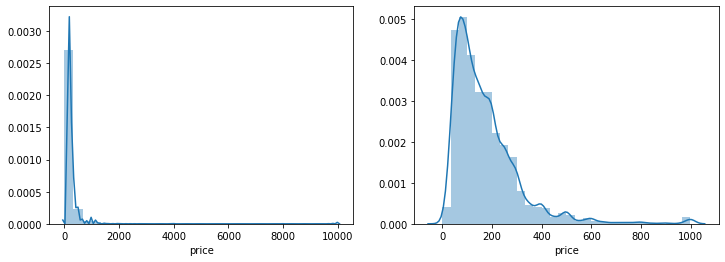

In [111]:
# Pricing distribution is realy skewed 
fig, axes = plt.subplots(1,2, figsize = (12,4))
sns.distplot(listings[('price')],bins=30, ax=axes[0])
sns.distplot(listings[listings.price<1000][('price')],bins=30, ax=axes[1]);

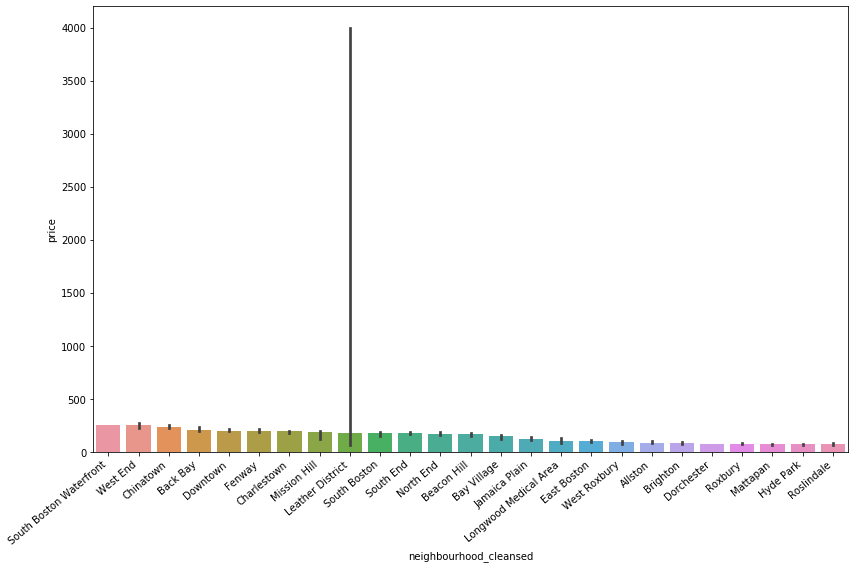

In [47]:
# let's take a look at the median price per neighbourhood
plt.figure(figsize=(12,8))
ax = sns.barplot(x='neighbourhood_cleansed',y ='price',data=listings,estimator=np.median,
                order=listings.groupby('neighbourhood_cleansed').median().price.sort_values(ascending=False).index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

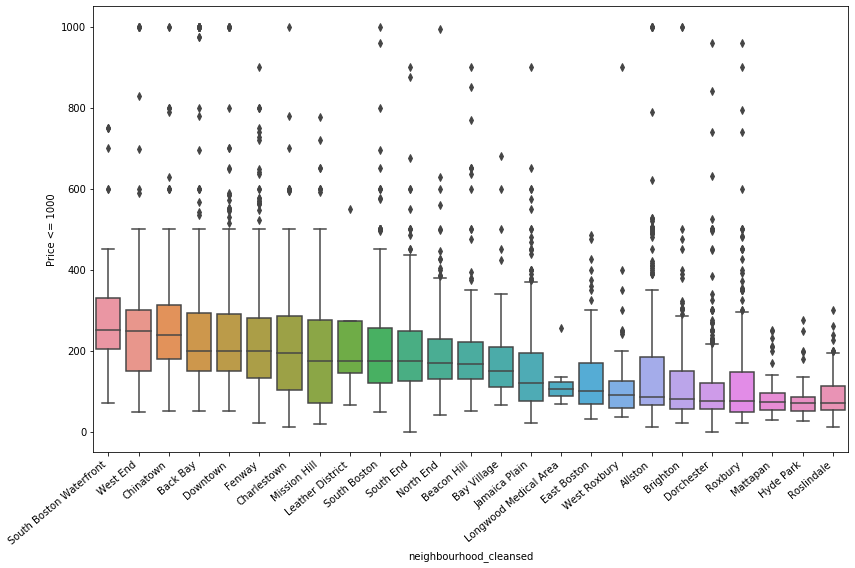

In [84]:
# let's take a look at the median price per neighbourhood
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='neighbourhood_cleansed',y ='price',data=listings[listings.price<=1000],
                order=listings.groupby('neighbourhood_cleansed').median().price.sort_values(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(ylabel='Price <= 1000')
plt.tight_layout()
plt.show()

In [113]:
# leather district has very few listings with a big outlier 
listings[listings.neighbourhood_cleansed=='Leather District'].price

bos  890      179.0
     1531    3999.0
     1953      65.0
     5862     550.0
     6084     170.0
Name: price, dtype: float64

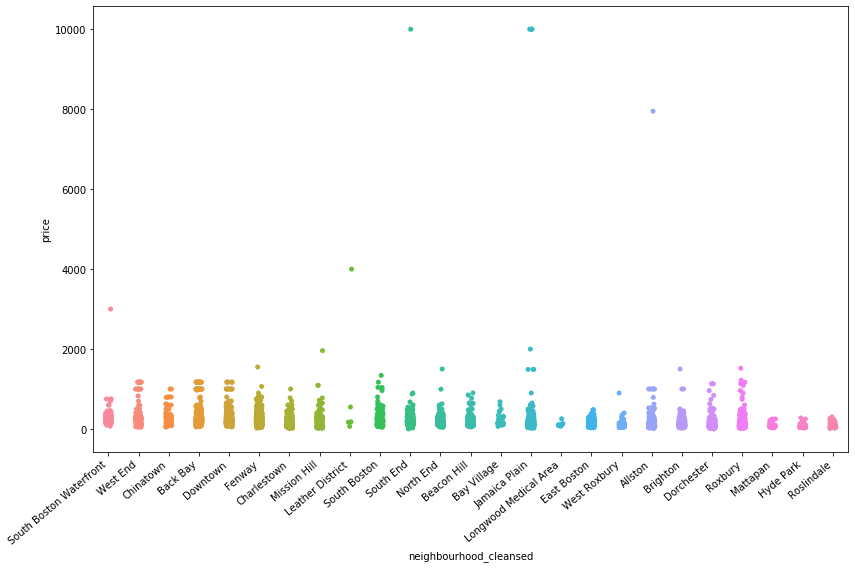

In [78]:
# infact we can see many neighbourhood have outliers 
plt.figure(figsize=(12,8))
ax = sns.stripplot(x='neighbourhood_cleansed',y ='price',data=listings,
                order=listings.groupby('neighbourhood_cleansed').median().price.sort_values(ascending=False).index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

//anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:1773: RuntimeWarning:

divide by zero encountered in true_divide



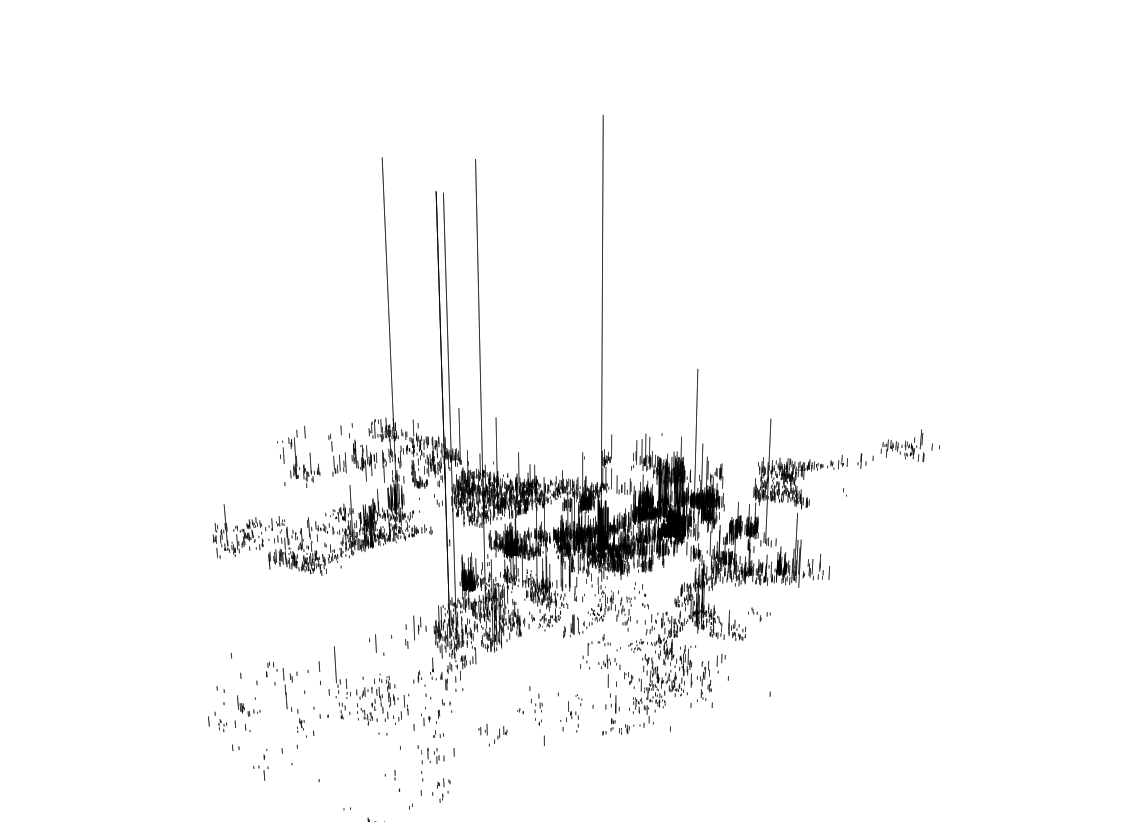

In [115]:
# here is a 3D plot if you want to see where are they
fig = plt.figure(figsize = [20, 15])
ax = fig.add_subplot(111, projection='3d')

ax.set_axis_off()
ax.azim = 270
ax.elev = 45
ax.dist = 7

ax.bar3d(listings.longitude, listings.latitude, np.zeros(len(listings)), 
         0.0002, 0.0002, listings.price,color='black', alpha=0.6)

plt.show()

In [116]:
# 0.85% of total listings have absurdly high price over $1000 all the way to $10,000 per ninght
# 6% of total listings have high price over $400 per ninght
listings[listings.price>1000].shape[0]/listings.shape[0], listings[listings.price>400].shape[0]/listings.shape[0]

(0.008506739955503207, 0.059547179688522446)

In [40]:
df_by_id[df_by_id.price>1000].shape[0]/df_by_id.shape[0],df_by_id[df_by_id.price>400].shape[0]/df_by_id.shape[0],

(0.00993277816795425, 0.056887729507374335)

In [132]:
# upon manual inspections some are temporary/fake listings and some are seasonal pricing spikes 
# How do we deal with these outliers...?
listings.iloc[listings[listings.price>1000]['price'].sort_values(ascending=False).index][['listing_url','price']]

listing_url    price
6146  https://www.airbnb.com/rooms/36112693  10000.0
6148  https://www.airbnb.com/rooms/36113049  10000.0
5876  https://www.airbnb.com/rooms/35156022  10000.0
6147  https://www.airbnb.com/rooms/36112870  10000.0
6150  https://www.airbnb.com/rooms/36113379  10000.0
5748  https://www.airbnb.com/rooms/34577654   7948.0
1531  https://www.airbnb.com/rooms/13657486   3999.0
1364  https://www.airbnb.com/rooms/12679021   3000.0
6603  https://www.airbnb.com/rooms/10141471   2000.0
6232  https://www.airbnb.com/rooms/36562787   1999.0
3108  https://www.airbnb.com/rooms/21681588   1960.0
5627  https://www.airbnb.com/rooms/33979575   1550.0
4887  https://www.airbnb.com/rooms/29682266   1520.0
5996  https://www.airbnb.com/rooms/35571147   1500.0
4343  https://www.airbnb.com/rooms/27367782   1500.0
6224  https://www.airbnb.com/rooms/36556004   1490.0
6229  https://www.airbnb.com/rooms/36560899   1490.0
6231  https://www.airbnb.com/rooms/36562321   1490.0
6867  https://www.airbnb.com/rooms/18600639   1375.0
5439  https://www.airbnb.com/rooms/33095836   1340.0
4886  https://www.airbnb.com/rooms/29682207   1220.0
5254  https://www.airbnb.com/rooms/32241438   1171.0
2288  https://www.airbnb.com/rooms/18409968   1171.0
2351  https://www.airbnb.com/rooms/18690216   1171.0
5169  https://www.airbnb.com/rooms/31381403   1171.0
2291  https://www.airbnb.com/rooms/18409972   1171.0
2290  https://www.airbnb.com/rooms/18409971   1171.0
2289  https://www.airbnb.com/rooms/18409969   1171.0
2092  https://www.airbnb.com/rooms/17144101   1171.0
2353  https://www.airbnb.com/rooms/18690218   1171.0
...                                     ...      ...
2096  https://www.airbnb.com/rooms/17144131   1171.0
2352  https://www.airbnb.com/rooms/18690217   1171.0
2091  https://www.airbnb.com/rooms/17143917   1171.0
3350  https://www.airbnb.com/rooms/22266418   1171.0
3351  https://www.airbnb.com/rooms/22266451   1171.0
5168  https://www.airbnb.com/rooms/31381399   1171.0
5158  https://www.airbnb.com/rooms/31263421   1171.0
5255  https://www.airbnb.com/rooms/32241441   1171.0
2087  https://www.airbnb.com/rooms/17143912   1171.0
2088  https://www.airbnb.com/rooms/17143914   1171.0
3352  https://www.airbnb.com/rooms/22266677   1171.0
2095  https://www.airbnb.com/rooms/17144130   1171.0
2094  https://www.airbnb.com/rooms/17144129   1171.0
3349  https://www.airbnb.com/rooms/22266063   1171.0
2089  https://www.airbnb.com/rooms/17143915   1171.0
2778  https://www.airbnb.com/rooms/20453913   1171.0
2687  https://www.airbnb.com/rooms/19961863   1171.0
2090  https://www.airbnb.com/rooms/17143916   1171.0
2886  https://www.airbnb.com/rooms/20862114   1170.0
2479  https://www.airbnb.com/rooms/19141729   1170.0
2321  https://www.airbnb.com/rooms/18550644   1130.0
2196  https://www.airbnb.com/rooms/17745620   1130.0
2540  https://www.airbnb.com/rooms/19330870   1130.0
5304  https://www.airbnb.com/rooms/32403872   1130.0
2195  https://www.airbnb.com/rooms/17744380   1090.0
5308  https://www.airbnb.com/rooms/32404555   1090.0
3104  https://www.airbnb.com/rooms/21677674   1090.0
3454  https://www.airbnb.com/rooms/22671354   1064.0
2491  https://www.airbnb.com/rooms/19160270   1040.0
5598  https://www.airbnb.com/rooms/33826996   1040.0

[65 rows x 2 columns]

# More! Data!

In [699]:
# So, if we want a more general report that doesn't just reflect the current seasonality,
# we would need more data!

# import tools
import glob
from functools import reduce

# a funtion to process all the csv files
def process_files(path):
    
    """
    Read all csv files from path and produce two dataframes.
    
    price_all_v: a vertically appended dataframe with selected columns 
         such as ['id','latitude','longitude','neighbourhood','price'] 
         
    price_filtered_v: a dataframe filters out listings which didn't last for all the months in price_all_v
    
    """
    
    all_files = glob.glob(path + "/*.csv")
    all_files.sort()

    df_list = []

    for file in all_files:
        df = pd.read_csv(file, usecols=['id','price'])
        df.columns = ['id','price'+file[-11:-4]]
        df_list.append(df)

    #herizontally append price, for filtering listings which didn't last for all the months   
    price_all_h = reduce(lambda left,right: pd.merge(left,right,on='id', how = 'outer'), df_list)
    # remove listings which didn't last for all the months, may not be useful
    price_filtered_h = price_all_h.dropna()

    # vertically append price for visulization 
    df_list = []

    for file in all_files:
        df = pd.read_csv(file, usecols=['id','latitude','longitude','neighbourhood','price','minimum_nights'])
        df['date_time'] = pd.to_datetime(file[-10:-6]+'-'+file[-6:-4])
        df['month'] = file[-10:-4]
        df_list.append(df)

    price_all_v = reduce(lambda x,y: pd.DataFrame.append(x,y,ignore_index=True), df_list)
    price_filtered_v = price_all_v[price_all_v.id.isin(price_filtered_h.id)]
    
    return price_all_v, price_filtered_v


In [700]:
# from the source the data was divided into two streams; one for city of Boston the other for city of Cambridge
# for this project both streams of data are combined into one sigle file for reporting on the entir Boston Area
# data for the city of Cambridge spans from 2018-11 to 2019-08; we have less data from Cambridge than from Boston

price_bos_12m, price_bos_filtered_12m = process_files('../input/b_listings')
price_cam_10m, price_cam_filtered_10m = process_files('../input/c_listings')

# 9 moths overlay 
# price_all_v = pd.concat([price_all_b,price_all_c],ignore_index=True)
# price_filtered_v = pd.concat([price_filtered_b,price_all_c], ignore_index=True)

In [208]:
# # pickle processed dataframes
# with open ('../input/df_price_cam_filtered_10m.pickle','wb') as fp:
#     pickle.dump(price_cam_filtered_10m,fp,pickle.HIGHEST_PROTOCOL)

# # with open('../input/df_t_stations.pickle', 'rb') as f:
# #     df_t_stations = pickle.load(f)

In [701]:
price_bos_12m.head()

id neighbourhood   latitude  longitude  price  minimum_nights  date_time  \
0  3781   East Boston  42.365241 -71.029361    125              30 2018-08-01   
1  5506       Roxbury  42.329809 -71.095595    145               3 2018-08-01   
2  6695       Roxbury  42.329941 -71.093505    169               3 2018-08-01   
3  6976    Roslindale  42.292438 -71.135765     65               3 2018-08-01   
4  8789      Downtown  42.359187 -71.062651     99              14 2018-08-01   

    month  
0  201808  
1  201808  
2  201808  
3  201808  
4  201808

In [703]:
price_bos_12m.minimum_nights.describe()

count    74096.000000
mean         5.218257
std         18.747455
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       1000.000000
Name: minimum_nights, dtype: float64

In [705]:
listings.minimum_nights.describe()

count    6264.000000
mean        5.666826
std        20.929425
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max      1000.000000
Name: minimum_nights, dtype: float64

In [702]:
# Some of the same listings recorded slitly different geocodes over 12 month
# Therefore need to unify the geocodes using the median, this is for calculating/assigning a t_station to the listing
df_by_id = price_bos_12m.groupby(['id']).median().reset_index()
df_by_id_mean = price_bos_12m.groupby(['id']).mean().reset_index()
df_by_id.head()

id   latitude  longitude  price  minimum_nights
0  3781  42.365241 -71.029361  125.0            30.0
1  5506  42.329809 -71.095595  145.0             3.0
2  6695  42.329941 -71.093505  169.0             3.0
3  6976  42.292438 -71.135765   65.0             3.0
4  8789  42.359187 -71.062651   99.0            28.0

In [704]:
df_by_id.minimum_nights.describe()

count    9967.000000
mean        5.665596
std        18.542025
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       600.000000
Name: minimum_nights, dtype: float64

In [543]:
# median price by id
df_by_id.price.describe()

count     9967.000000
mean       188.248972
std        308.345353
min          0.000000
25%         78.000000
50%        140.000000
75%        221.000000
max      10000.000000
Name: price, dtype: float64

In [60]:
# mean price by id
df_by_id_mean.price.describe()

count     9967.000000
mean       191.673272
std        318.625038
min          0.000000
25%         78.550000
50%        140.000000
75%        221.555556
max      10000.000000
Name: price, dtype: float64

In [42]:
# price in July 2019
listings.price.describe()

count     6264.000000
mean       199.063697
std        347.696661
min          0.000000
25%         80.000000
50%        149.000000
75%        235.000000
max      10000.000000
Name: price, dtype: float64

In [58]:
# all the price, no grouping 
price_bos_12m.price.describe()

count    74096.000000
mean       193.784671
std        280.324395
min          0.000000
25%         80.000000
50%        149.000000
75%        225.000000
max      10000.000000
Name: price, dtype: float64

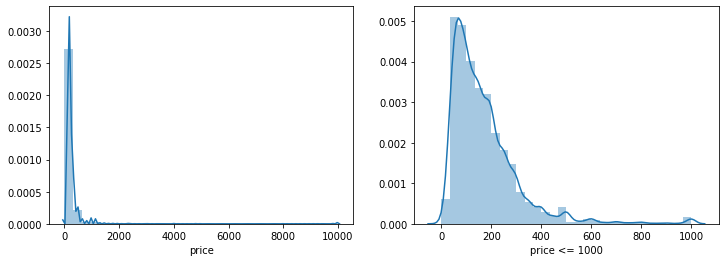

In [67]:
# Pricing distribution is realy skewed 
fig, axes = plt.subplots(1,2, figsize = (12,4))
sns.distplot(df_by_id[('price')],bins=30, ax=axes[0])
sns.distplot(df_by_id[df_by_id.price<=1000][('price')],bins=30, ax=axes[1],axlabel='price <= 1000');

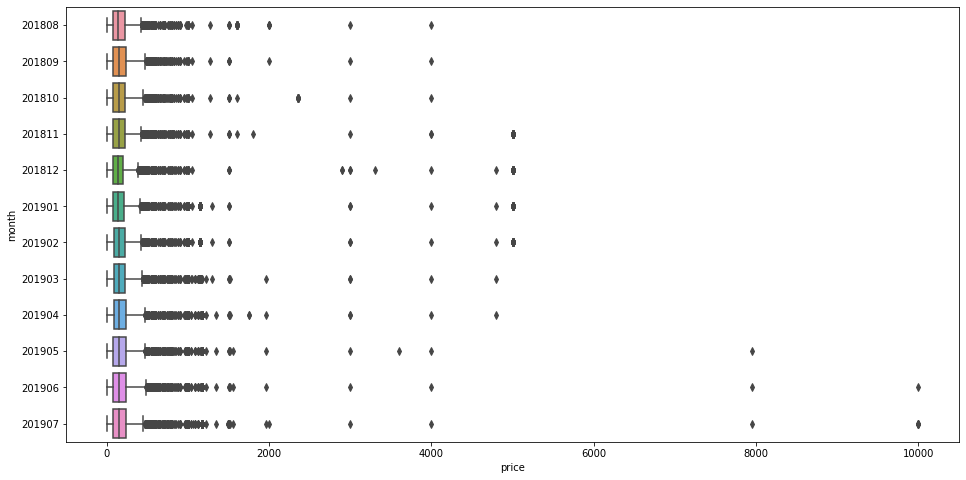

In [210]:
plt.figure(figsize=(16,8))
sns.boxplot(y='month', x='price', data=price_bos_12m,orient='h');

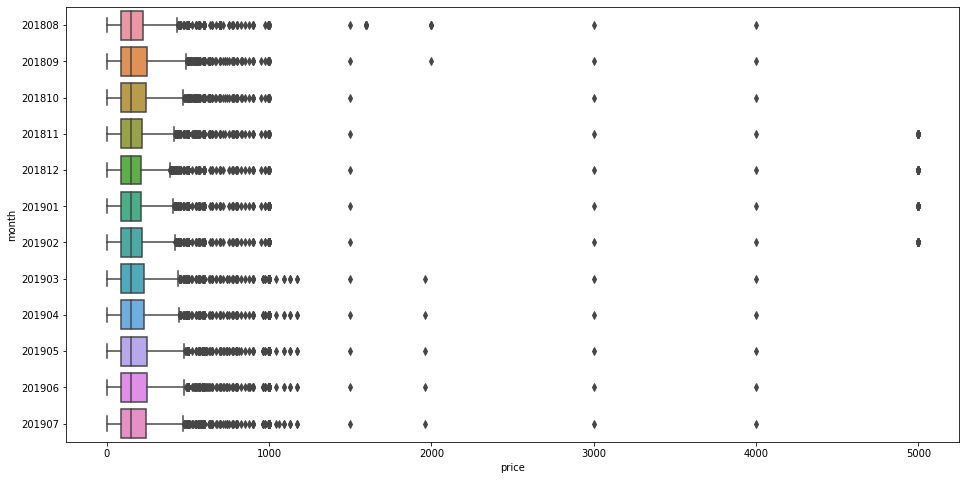

In [211]:
plt.figure(figsize=(16,8))
sns.boxplot(y='month', x='price', data=price_bos_filtered_12m,orient='h');

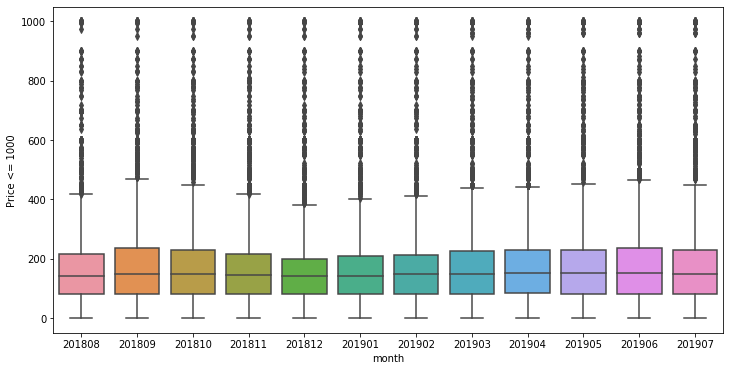

In [73]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='price', data=price_bos_12m[price_bos_12m.price<=1000],orient='v').set(ylabel='Price <= 1000');

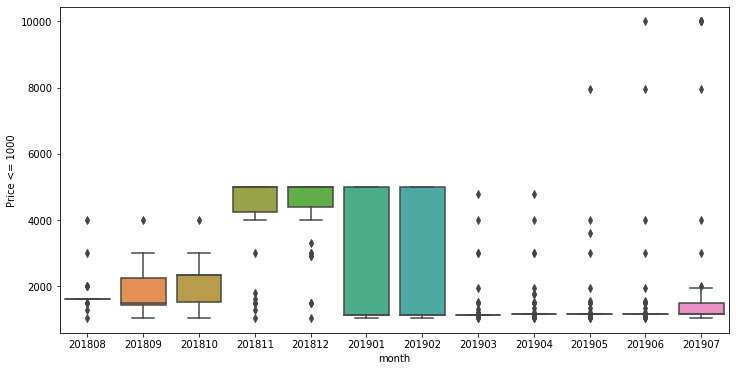

In [108]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='price', data=price_bos_12m[price_bos_12m.price>1000],orient='v').set(ylabel='Price > 1000');

In [43]:
pricing_stats_all = price_bos_12m.groupby('month').price.describe().reset_index()
pricing_stats_all

month   count        mean         std  min   25%    50%     75%      max
0   201808  6036.0  184.089629  184.401721  0.0  80.0  140.0  219.00   3999.0
1   201809  5957.0  181.925802  154.076974  0.0  80.0  149.0  239.00   3999.0
2   201810  6014.0  184.020619  177.108393  0.0  80.0  149.0  230.00   3999.0
3   201811  6296.0  196.547332  357.437717  0.0  80.0  147.0  219.00   5000.0
4   201812  6217.0  193.077208  365.352224  0.0  80.0  143.0  200.00   5000.0
5   201901  6247.0  202.083400  371.325512  0.0  82.0  144.0  212.00   5000.0
6   201902  6155.0  206.795126  375.423899  0.0  83.0  150.0  220.00   5000.0
7   201903  6221.0  190.110432  194.715351  0.0  84.0  150.0  228.00   4800.0
8   201904  6202.0  195.781683  201.970913  0.0  85.0  150.0  238.75   4800.0
9   201905  6241.0  194.367089  217.007754  0.0  80.0  150.0  237.00   7948.0
10  201906  6246.0  196.464137  247.036022  0.0  80.0  150.0  242.75  10000.0
11  201907  6264.0  199.063697  347.696661  0.0  80.0  149.0  235.00  10000.0

In [119]:
pricing_stats_filtered = price_bos_filtered_12m.groupby('month').price.describe().reset_index()
pricing_stats_filtered

month   count        mean         std  min    25%    50%     75%     max
0   201808  3802.0  191.713046  190.781513  0.0  85.00  150.0  225.00  3999.0
1   201809  3802.0  187.306681  161.779595  0.0  88.00  150.0  247.75  3999.0
2   201810  3802.0  186.260915  158.914344  0.0  88.00  150.0  242.75  3999.0
3   201811  3802.0  207.203314  403.948891  0.0  88.00  150.0  220.00  5000.0
4   201812  3802.0  201.690952  402.587780  0.0  88.00  149.0  208.75  5000.0
5   201901  3802.0  206.077065  408.029851  0.0  85.00  149.0  213.00  5000.0
6   201902  3802.0  209.286954  408.067146  0.0  85.00  150.0  220.00  5000.0
7   201903  3802.0  187.244608  174.513478  0.0  86.00  150.0  229.00  3999.0
8   201904  3802.0  188.665176  174.901335  0.0  88.00  150.0  231.00  3999.0
9   201905  3802.0  191.912415  178.340773  0.0  88.00  150.0  245.00  3999.0
10  201906  3802.0  192.320095  179.206070  0.0  86.25  150.0  245.00  3999.0
11  201907  3802.0  192.498948  179.292883  0.0  86.00  150.0  240.00  3999.0

In [142]:
pricing_stats_abov1000 = price_bos_12m[price_bos_12m.price>1000].groupby('month').price.describe().reset_index()
pricing_stats_abov1000

month  count         mean          std     min      25%     50%     75%  \
0   201808   27.0  1755.851852   559.447441  1050.0  1599.00  1599.0  1599.0   
1   201809    8.0  1978.000000  1012.087941  1050.0  1443.75  1500.0  2250.0   
2   201810   18.0  2164.055556   690.121939  1050.0  1524.75  2353.0  2353.0   
3   201811   38.0  4242.578947  1397.361019  1050.0  4249.25  5000.0  5000.0   
4   201812   39.0  4344.846154  1217.900103  1050.0  4399.50  5000.0  5000.0   
5   201901   76.0  2708.802632  1858.041880  1050.0  1143.00  1143.0  5000.0   
6   201902   83.0  2576.746988  1830.096378  1050.0  1143.00  1143.0  5000.0   
7   201903   62.0  1336.806452   668.046058  1040.0  1143.00  1143.0  1143.0   
8   201904   65.0  1365.292308   651.033691  1040.0  1171.00  1171.0  1171.0   
9   201905   63.0  1418.587302   987.861565  1040.0  1171.00  1171.0  1171.0   
10  201906   63.0  1520.174603  1440.966819  1040.0  1171.00  1171.0  1171.0   
11  201907   63.0  2107.174603  2520.914360  1040.0  1171.00  1171.0  1490.0   

        max  
0    3999.0  
1    3999.0  
2    3999.0  
3    5000.0  
4    5000.0  
5    5000.0  
6    5000.0  
7    4800.0  
8    4800.0  
9    7948.0  
10  10000.0  
11  10000.0

In [112]:
len(price_bos_12m.id.unique()),len(price_bos_filtered_12m.id.unique())

(9967, 3802)

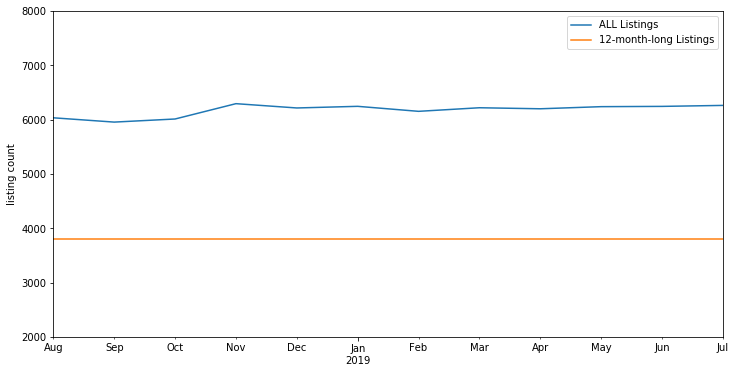

In [113]:
# listings count by month
price_bos_12m['date_time'].value_counts().sort_index().plot.line(figsize=(12,6),label='ALL Listings')
price_bos_filtered_12m['date_time'].value_counts().sort_index().plot.line(label='12-month-long Listings')
plt.yticks(np.arange(2000, 9000, 1000))
plt.ylabel('listing count')
plt.legend();

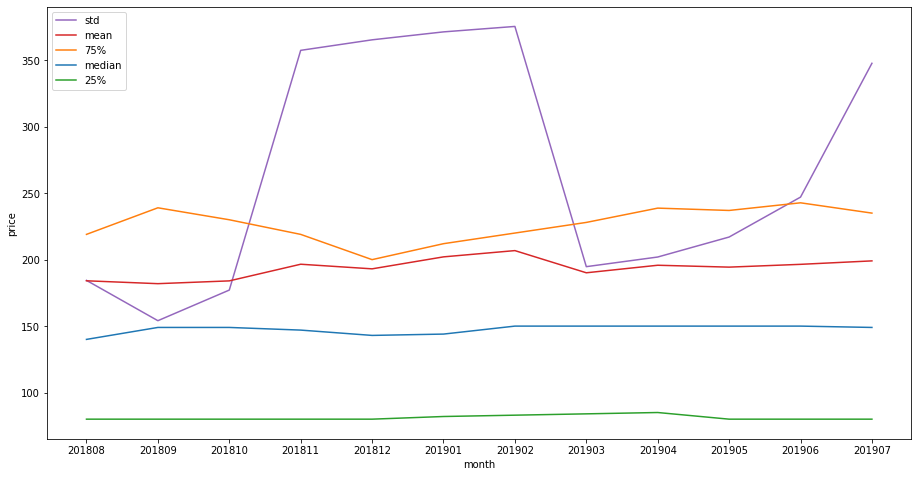

In [101]:
df = pricing_stats_all

fig = plt.figure(figsize=(12,6))
axes = fig.add_axes([0,0,1,1])
axes.plot(df.month, df['std'], label='std',color='tab:purple')
axes.plot(df.month, df['mean'], label='mean',color='tab:red')
axes.plot(df.month, df['75%'], label='75%',color='tab:orange')
axes.plot(df.month, df['50%'], label='median',color='tab:blue')
axes.plot(df.month, df['25%'], label='25%',color='tab:green')
axes.legend()
plt.xlabel('month')
plt.ylabel('price');

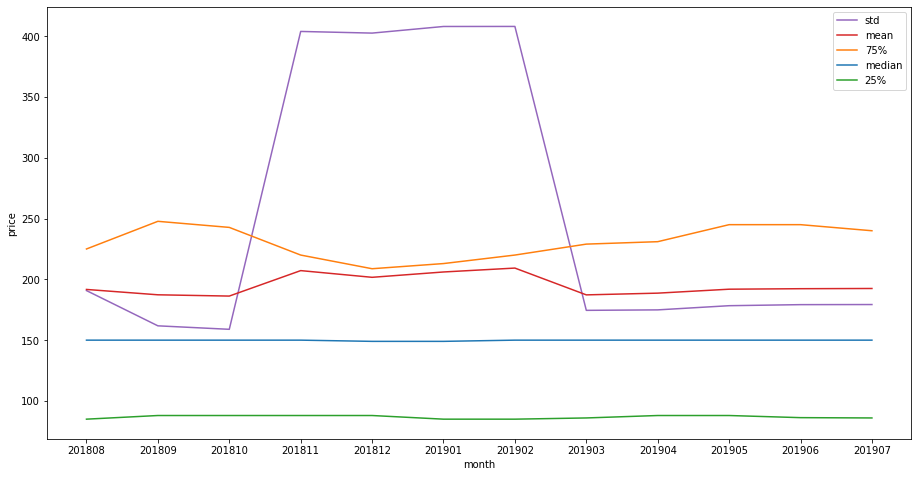

In [127]:
df = pricing_stats_filtered

fig = plt.figure(figsize=(12,6))
axes = fig.add_axes([0,0,1,1])
axes.plot(df.month, df['std'], label='std',color='tab:purple')
axes.plot(df.month, df['mean'], label='mean',color='tab:red')
axes.plot(df.month, df['75%'], label='75%',color='tab:orange')
axes.plot(df.month, df['50%'], label='median',color='tab:blue')
axes.plot(df.month, df['25%'], label='25%',color='tab:green')
axes.legend()
plt.xlabel('month')
plt.ylabel('price');

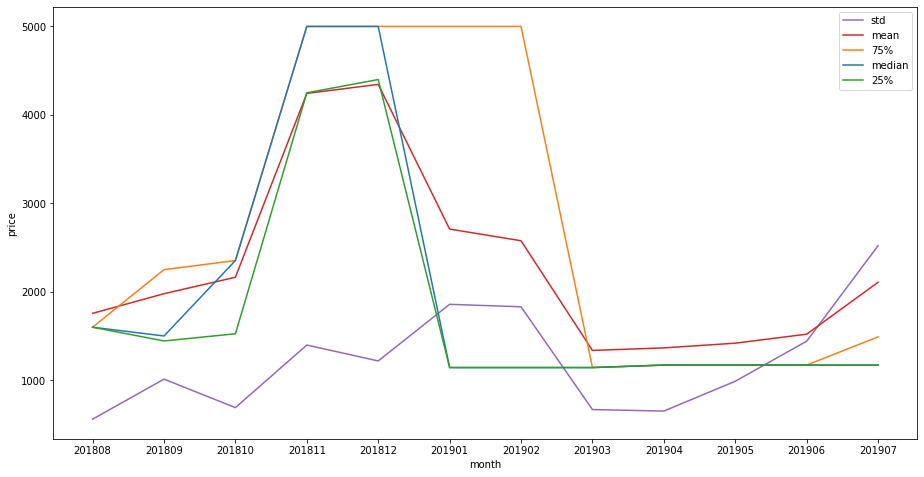

In [143]:
df = pricing_stats_abov1000

fig = plt.figure(figsize=(12,6))
axes = fig.add_axes([0,0,1,1])
axes.plot(df.month, df['std'], label='std',color='tab:purple')
axes.plot(df.month, df['mean'], label='mean',color='tab:red')
axes.plot(df.month, df['75%'], label='75%',color='tab:orange')
axes.plot(df.month, df['50%'], label='median',color='tab:blue')
axes.plot(df.month, df['25%'], label='25%',color='tab:green')
axes.legend()
plt.xlabel('month')
plt.ylabel('price');

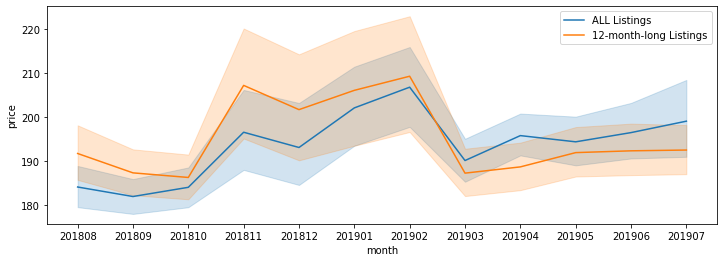

In [131]:
# listings price by month
plt.figure(figsize=(12,4))
sns.lineplot(x='month',y = 'price',data=price_bos_12m,label='ALL Listings')
sns.lineplot(x='month',y = 'price',data=price_bos_filtered_12m,label='12-month-long Listings');

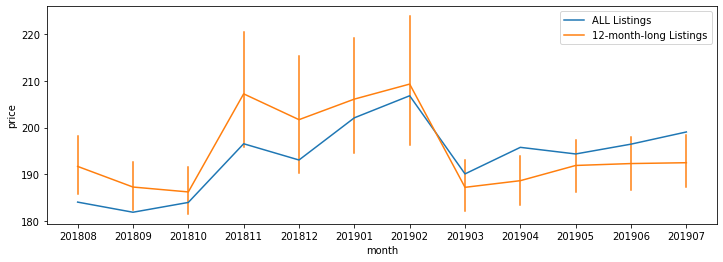

In [146]:
# listings price by month
plt.figure(figsize=(12,4))
sns.lineplot(x='month',y = 'price',data=price_bos_12m,estimator=np.mean,ci = None, label='ALL Listings')
sns.lineplot(x='month',y = 'price',data=price_bos_filtered_12m,estimator=np.mean,err_style='bars',label='12-month-long Listings');

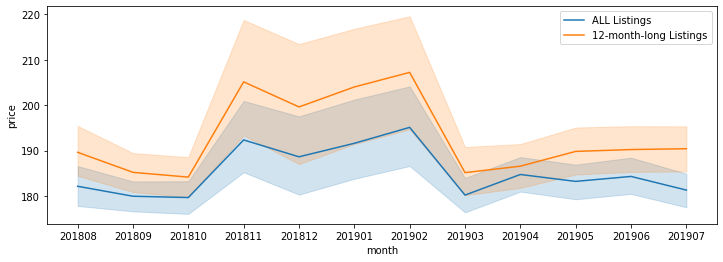

In [332]:
# price of listing pirce <=1000 by month 
ids_1000 = price_bos_12m[price_bos_12m.price<=1000].id.unique()
tier_1000_all = price_bos_12m[price_bos_12m.id.isin(ids_1000)].groupby(['id','month']).price.median().reset_index()
tier_1000_12 = price_bos_filtered_12m[price_bos_filtered_12m.id.isin(ids_1000)].groupby(['id','month']).price.median().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(x='month',y = 'price',data=tier_1000_all,label='ALL Listings')
sns.lineplot(x='month',y = 'price',data=tier_1000_12,label='12-month-long Listings');

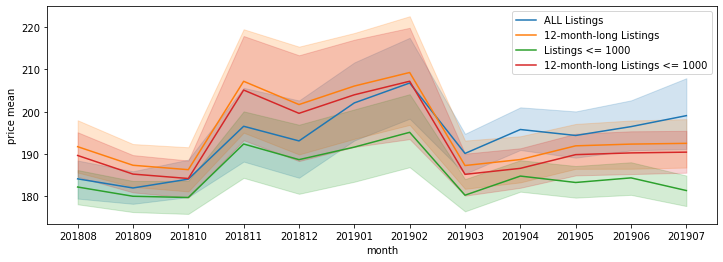

In [333]:
# listings price by month
plt.figure(figsize=(12,4))
sns.lineplot(x='month',y = 'price',data=price_bos_12m,label='ALL Listings')
sns.lineplot(x='month',y = 'price',data=price_bos_filtered_12m,label='12-month-long Listings')
sns.lineplot(x='month',y = 'price',data=tier_1000_all,label='Listings <= 1000')
sns.lineplot(x='month',y = 'price',data=tier_1000_12,label='12-month-long Listings <= 1000');
plt.ylabel('price mean');

In [155]:
3802/9967, 10/185, 20/185, 

(0.3814588140864854, 0.05405405405405406, 0.10810810810810811)

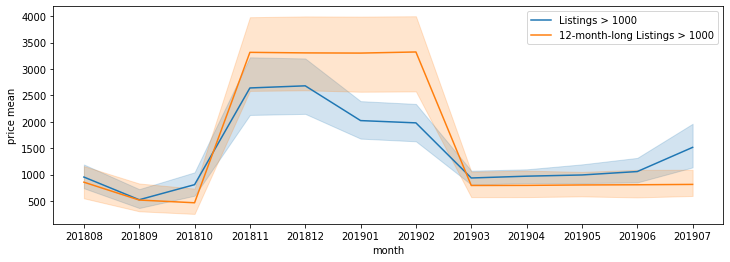

In [308]:
# price of listing pirce > 1000 by month 
ids_1000 = price_bos_12m[price_bos_12m.price>1000].id.unique()
tier_1000_all = price_bos_12m[price_bos_12m.id.isin(ids_1000)].groupby(['id','month']).price.median().reset_index()
tier_1000_12 = price_bos_filtered_12m[price_bos_filtered_12m.id.isin(ids_1000)].groupby(['id','month']).price.median().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(x='month',y = 'price',data=tier_1000_all,label='Listings > 1000')
sns.lineplot(x='month',y = 'price',data=tier_1000_12,label='12-month-long Listings > 1000')
plt.ylabel('price mean');

In [382]:
df1 = price_bos_12m.groupby(['id']).price.min().reset_index()
df1 = df1.rename(columns={"price": "_min"})
df1['_max']= price_bos_12m.groupby(['id']).price.max().values
df1['dif'] = df1['_max'] - df1['_min']
df1['min_price_min_monh'] = df1.merge(price_bos_12m,'left',left_on=['id','_min'],right_on=['id','price']).groupby(['id']).month.min().values
df1['min_price_max_monh'] = df1.merge(price_bos_12m,'left',left_on=['id','_min'],right_on=['id','price']).groupby(['id']).month.max().values
df1['max_price_min_monh'] = df1.merge(price_bos_12m,'left',left_on=['id','_max'],right_on=['id','price']).groupby(['id']).month.min().values
df1['max_price_max_monh'] = df1.merge(price_bos_12m,'left',left_on=['id','_max'],right_on=['id','price']).groupby(['id']).month.max().values
df1.shape


(9967, 8)

In [389]:
df1.sort_values('_max',ascending = False).head(10)

id   _min   _max   dif min_price_min_monh min_price_max_monh  \
9550  35156022  10000  10000     0             201906             201907   
9853  36113379  10000  10000     0             201907             201907   
9850  36112870  10000  10000     0             201907             201907   
9849  36112693  10000  10000     0             201907             201907   
9851  36113049  10000  10000     0             201907             201907   
9379  34577654   7948   7948     0             201905             201907   
4180  20858430    120   5000  4880             201808             201810   
3599  19141729    300   5000  4700             201808             201810   
4531  21681588    249   5000  4751             201808             201810   
3181  17745620    280   5000  4720             201808             201810   

     max_price_min_monh max_price_max_monh  
9550             201906             201907  
9853             201907             201907  
9850             201907             201907  
9849             201907             201907  
9851             201907             201907  
9379             201905             201907  
4180             201811             201902  
3599             201811             201902  
4531             201811             201902  
3181             201811             201902

In [551]:
# group ids base on price tiers
price_tiers = [[-1,100],[100,200],[200,300],[300,400],[400,500],[500,600],[600,700],[700,800],[800,900],[900,1000],
    [1000,2000],[2000,3000],[3000,4000],[4000,5000],[5000,6000],[6000,7000],[7000,8000],[8000,9000],[9000,10000]]

df = price_bos_12m

ids_list = []
for tier in price_tiers:
    ids = set(df[(df.price>tier[0])&(df.price<=tier[1])].id.unique())
    ids_list.append(ids)

In [552]:
t= set()
for i in ids_list:
    t.update(i)
len(t)

9967

In [ ]:
t = union()

In [590]:
a_set = [{1,2,3,4},{2,3,4,5,9},{3,4,5,6},{4,5,6,7,8,9},{10}]

"""
a_set = [{1,2,3,4},{2,3,4,5,9},{3,4,5,6},{4,5,6,7,8,9}]
a_set = [    0,        1,         2,            3     ]
a_set = [   -4,       -3,        -2,           -1     ]

0 -1
0 -2
0 -3
0 -4
1 -1
1 -2
1 -3
2 -1
2 -2
3 -1

for i in range(4):
    for j in range(1,4+1-i):
        print(i,-j)
"""

def gap_map(data):

    _map = pd.DataFrame(np.zeros((len(data),len(data))))

    for i in range(len(data)):
        for j in range(1,len(data)+1-i):
            idsf = data[i]
            idsb = data[-j]
            intersect = idsf.intersection(idsb)
            _map[data.index(idsb)][data.index(idsf)] = _map[data.index(idsb)][data.index(idsf)]+len(intersect)
    #         print(idsf,idsb)
    #         print(i,-j,data.index(idsf),data.index(idsb),len(intersect))
            data = [ids-intersect for ids in data]
    #         print(data)
    return _map

sum(gap_map(a_set))

10

In [553]:
sum(np.sum(gap_map(ids_list)))

9967.0

In [631]:
gapmap.shape

(19, 19)

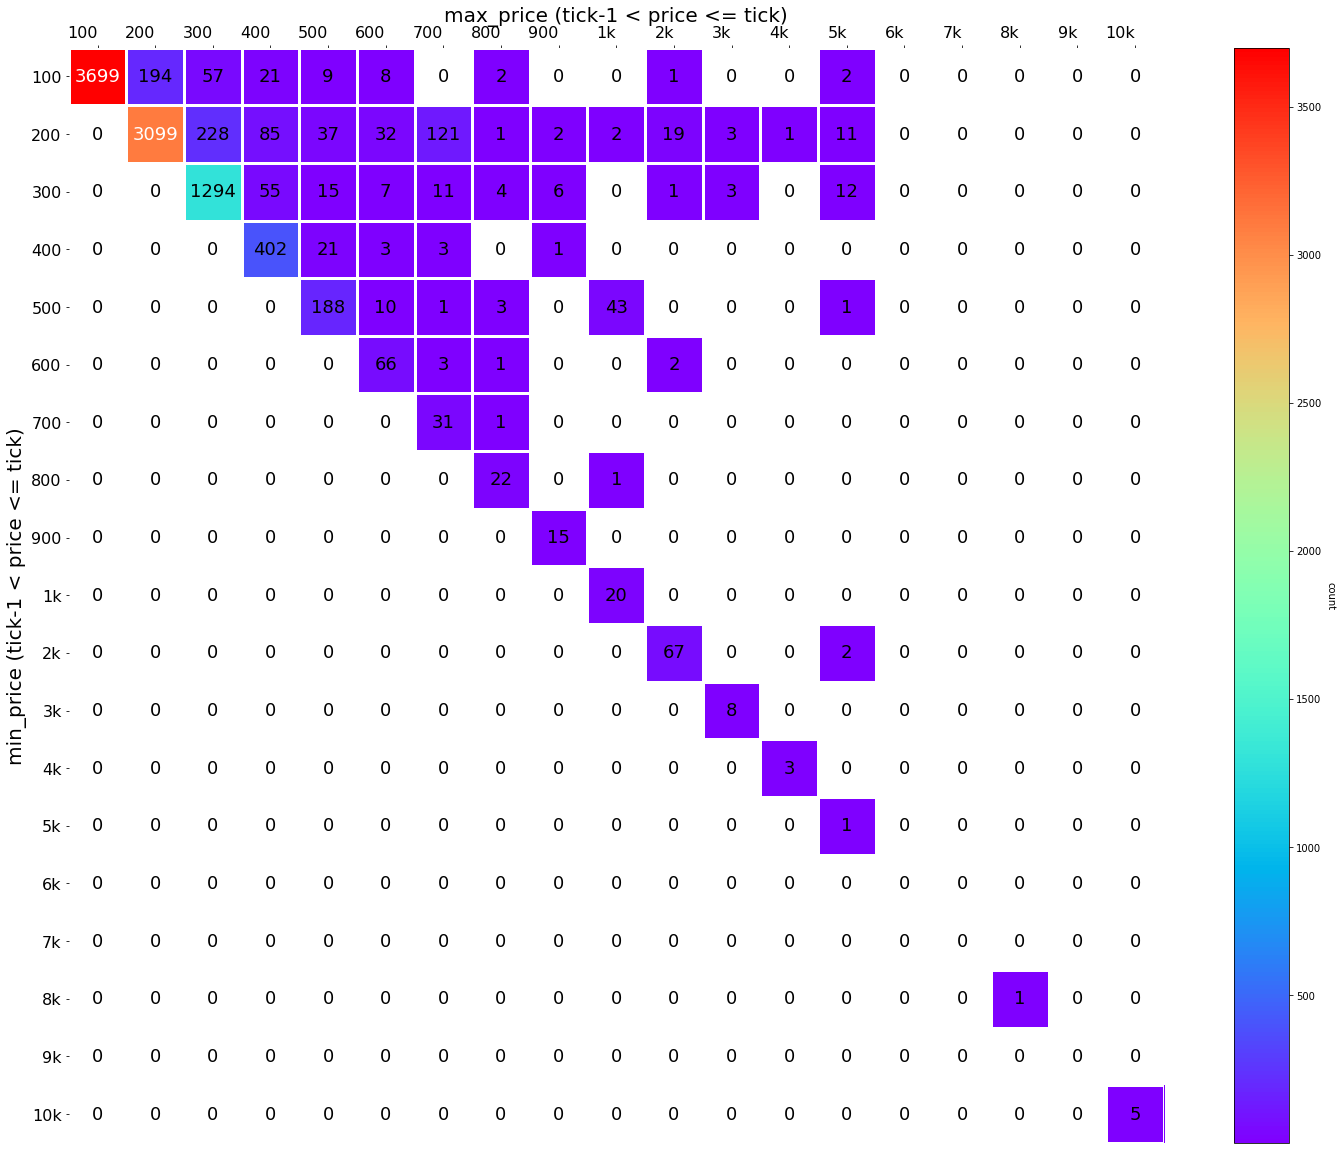

In [719]:
gapmap = gap_map(ids_list).replace(0,np.nan)

ticks = [100,200,300,400,500,600,700,800,900,'1k','2k','3k','4k','5k','6k','7k','8k','9k','10k']

fig, ax = plt.subplots(figsize=(20,16))
ax.tick_params(labelsize=16)
ax.xaxis.set_label_position('top') 

im, cbar = heatmap(gapmap.values, ticks, ticks, ax=ax,
                   cmap="rainbow", cbarlabel="count")
texts = annotate_heatmap(im, valfmt="{x:.0f}",fontsize=18)

fig.tight_layout()
plt.setp(ax.get_xticklabels(), rotation=0)
plt.xlabel('max_price (tick-1 < price <= tick)',fontsize=20)
plt.ylabel('min_price (tick-1 < price <= tick)',fontsize=20);
plt.show();

In [342]:
df1.dif.describe()

count    9967.000000
mean       41.759005
std       279.755806
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      4901.000000
Name: dif, dtype: float64

In [610]:
df1[df1._max==5000].sort_values('dif',ascending = False)._min.describe()

count      28.000000
mean      300.392857
std       315.290147
min        99.000000
25%       168.750000
50%       224.500000
75%       276.250000
max      1520.000000
Name: _min, dtype: float64

In [541]:
len(df_by_id)

9967

In [606]:
# 604
df1[df1.dif>df1._min].sort_values('dif',ascending = False)

id  _min  _max   dif min_price_min_monh min_price_max_monh  \
5491  23871901    99  5000  4901             201808             201810   
3175  17701434   100  5000  4900             201808             201810   
3006  17138041   120  5000  4880             201808             201810   
4180  20858430   120  5000  4880             201808             201810   
685    4553903   125  5000  4875             201808             201810   
1262   8036024   150  5000  4850             201808             201810   
4182  20861260   150  5000  4850             201808             201810   
1761  11474629   175  5000  4825             201808             201810   
5051  22794472   177  5000  4823             201808             201810   
5056  22814449   188  5000  4812             201808             201810   
4527  21678120   199  5000  4801             201808             201810   
4525  21677674   199  5000  4801             201808             201810   
4201  20913672   199  5000  4801             201808             201810   
3180  17744380   220  5000  4780             201808             201810   
5057  22814686   229  5000  4771             201808             201810   
4531  21681588   249  5000  4751             201808             201810   
3589  19115873   249  5000  4751             201808             201810   
3613  19160270   250  5000  4750             201808             201810   
746    4879579   264  5000  4736             201808             201810   
3382  18550644   275  5000  4725             201808             201810   
3680  19330870   275  5000  4725             201808             201810   
3181  17745620   280  5000  4720             201808             201810   
2057  13190410   299  5000  4701             201808             201810   
3599  19141729   300  5000  4700             201808             201810   
4184  20862114   300  5000  4700             201808             201810   
7647  29682306   480  5000  4520             201903             201907   
7645  29682207  1220  5000  3780             201903             201907   
7646  29682266  1520  5000  3480             201903             201907   
349    1819994   170  3300  3130             201901             201901   
1156   7499960   170  2900  2730             201901             201901   
6021  25476466   170  2900  2730             201901             201901   
7367  29183074   132  2353  2221             201901             201902   
7364  29182155   222  2353  2131             201812             201812   
7368  29183079   224  2353  2129             201812             201812   
7365  29182847   225  2353  2128             201901             201901   
2566  15154816    99  2000  1901             201810             201907   
2552  15127120   127  2000  1873             201901             201901   
2628  15337363   128  2000  1872             201901             201901   
2632  15341441   134  2000  1866             201812             201812   
6277  26446700   118  1599  1481             201901             201901   
6290  26450815   122  1599  1477             201901             201901   
6282  26450604   124  1599  1475             201812             201901   
6188  26138283   130  1599  1469             201901             201901   
6286  26450779   134  1599  1465             201901             201901   
6289  26450795   137  1599  1462             201901             201901   
6283  26450605   138  1599  1461             201901             201901   
6288  26450789   143  1599  1456             201812             201812   
6284  26450608   143  1599  1456             201812             201812   
6287  26450780   148  1599  1451             201901             201901   
6285  26450614   148  1599  1451             201812             201812   
6294  26452339   160  1599  1439             201811             201812   
6291  26450816   177  1599  1422             201901             201901   
6293  26452180   178  1599  1421             201901             201901   
6154  26062023  

In [356]:
# 869
df1[df1.dif>df1.price*.9].sort_values('dif',ascending = False).shape

(665, 8)

In [345]:
41/188

0.21808510638297873

In [338]:
df1[df1.dif>df1.price].sort_values('dif',ascending = False).dif.describe()

count     604.000000
mean      596.614238
std       978.632519
min        18.000000
25%       176.000000
50%       343.000000
75%       567.000000
max      4901.000000
Name: dif, dtype: float64

In [387]:
df1[df1.id.isin(ids_1000_2000)].sort_values('dif',ascending = False)

id  _min  _max   dif min_price_min_monh min_price_max_monh  \
4525  21677674   199  5000  4801             201808             201810   
3180  17744380   220  5000  4780             201808             201810   
4531  21681588   249  5000  4751             201808             201810   
3613  19160270   250  5000  4750             201808             201810   
3382  18550644   275  5000  4725             201808             201810   
3680  19330870   275  5000  4725             201808             201810   
3181  17745620   280  5000  4720             201808             201810   
3599  19141729   300  5000  4700             201808             201810   
4184  20862114   300  5000  4700             201808             201810   
7645  29682207  1220  5000  3780             201903             201907   
7646  29682266  1520  5000  3480             201903             201907   
2566  15154816    99  2000  1901             201810             201907   
2552  15127120   127  2000  1873             201901             201901   
2628  15337363   128  2000  1872             201901             201901   
2632  15341441   134  2000  1866             201812             201812   
6277  26446700   118  1599  1481             201901             201901   
6290  26450815   122  1599  1477             201901             201901   
6282  26450604   124  1599  1475             201812             201901   
6188  26138283   130  1599  1469             201901             201901   
6286  26450779   134  1599  1465             201901             201901   
6289  26450795   137  1599  1462             201901             201901   
6283  26450605   138  1599  1461             201901             201901   
6288  26450789   143  1599  1456             201812             201812   
6284  26450608   143  1599  1456             201812             201812   
6287  26450780   148  1599  1451             201901             201901   
6285  26450614   148  1599  1451             201812             201812   
6294  26452339   160  1599  1439             201811             201812   
6291  26450816   177  1599  1422             201901             201901   
6293  26452180   178  1599  1421             201901             201901   
6154  26062023   194  1599  1405             201811             201811   
6153  26060933   230  1599  1369             201812             201812   
7788  29927188   600  1800  1200             201812             201812   
5026  22671354   159  1064   905             201808             201808   
1714  10882267   600  1050   450             201905             201905   
8356  31381403  1143  1171    28             201901             201903   
8359  31386462  1143  1171    28             201901             201903   
8355  31381399  1143  1171    28             201901             201903   
8354  31381394  1143  1171    28             201901             201903   
8360  31386463  1143  1171    28             201901             201903   
8361  31386465  1143  1171    28             201901             201903   
8324  31263421  1143  1171    28             201901             201903   
4862  22266677  1143  1171    28             201901             201903   
8546  32241438  1143  1171    28             201903             201903   
4861  22266451  1143  1171    28             201901             201902   
4860  22266418  1143  1171    28             201901             201903   
8547  32241441  1143  1171    28             201903             201903   
8358  31386460  1143  1171    28             201901             201903   
4859  22266063  1143  1171    28             201902             201903   
4034  20453913  1143  1171    28             201901             201903   
3066  17306356  1143  1171    28             201901             201903   
3010  17143912  1143  1171    28             201901             201903   
3027  17144134  1143  1171    28             201901             201903   
3026  17144131  1143  1171    28             201902             201903   
3025  17144130  

In [260]:
# 267
df1[(df1.dif>df1.price)&(df1.max_price_min_monh!= df1.max_price_max_monh)].sort_values('dif',ascending = False)

id  price   max   dif min_price_min_monh min_price_max_monh  \
5491  23871901     99  5000  4901             201808             201810   
3175  17701434    100  5000  4900             201808             201810   
4180  20858430    120  5000  4880             201808             201810   
3006  17138041    120  5000  4880             201808             201810   
685    4553903    125  5000  4875             201808             201810   
1262   8036024    150  5000  4850             201808             201810   
4182  20861260    150  5000  4850             201808             201810   
1761  11474629    175  5000  4825             201808             201810   
5051  22794472    177  5000  4823             201808             201810   
5056  22814449    188  5000  4812             201808             201810   
4201  20913672    199  5000  4801             201808             201810   
4527  21678120    199  5000  4801             201808             201810   
4525  21677674    199  5000  4801             201808             201810   
3180  17744380    220  5000  4780             201808             201810   
5057  22814686    229  5000  4771             201808             201810   
4531  21681588    249  5000  4751             201808             201810   
3589  19115873    249  5000  4751             201808             201810   
3613  19160270    250  5000  4750             201808             201810   
746    4879579    264  5000  4736             201808             201810   
3382  18550644    275  5000  4725             201808             201810   
3680  19330870    275  5000  4725             201808             201810   
3181  17745620    280  5000  4720             201808             201810   
2057  13190410    299  5000  4701             201808             201810   
4184  20862114    300  5000  4700             201808             201810   
3599  19141729    300  5000  4700             201808             201810   
7647  29682306    480  5000  4520             201903             201907   
7645  29682207   1220  5000  3780             201903             201907   
7646  29682266   1520  5000  3480             201903             201907   
2566  15154816     99  2000  1901             201810             201907   
1408   8814479    146   999   853             201808             201812   
6078  25798930    165  1000   835             201905             201906   
1180   7618925    100   793   693             201808             201809   
4804  22175348    139   735   596             201808             201808   
3747  19552273    259   832   573             201808             201808   
3531  18945971    429   999   570             201808             201812   
3530  18945958    429   999   570             201808             201812   
5149  23123033    429   999   570             201808             201812   
5152  23124049    429   999   570             201808             201812   
3529  18945938    429   999   570             201808             201812   
4800  22164451    429   999   570             201808             201812   
4799  22164446    429   999   570             201808             201812   
4798  22164240    429   999   570             201808             201812   
3526  18945236    429   999   570             201808             201812   
4796  22164030    429   999   570             201808             201812   
3510  18910240    429   999   570             201808             201812   
3508  18908082    429   999   570             201808             201812   
3507  18907659    429   999   570             201808             201812   
3503  18895387    429   999   570             201808             201812   
4453  21515803    429   999   570             201808             201812   
5613  24243652    429   999   570             201808             201812   
2633  15341783    429   999   570             201808             201812   
3650  19265709    429   999   570             201808             201812   
800    5454513    429   999   570    

In [249]:
df1[df1['_min']>1000].shape[0], df1[df1['_max']>1000].shape[0], df1.shape[0]

(87, 143, 9967)

In [680]:
df = price_bos_12m

# p<=100
ids_100 = df[df.price<=100].id.unique()

# 100<p<=150
ids_100_150 = df[(df.price>100)&(df.price<=150)].id.unique()

# 150<p<=250
ids_150_250 = df[(df.price>150)&(df.price<=250)].id.unique()

# 250<p<=400
ids_250_400 = df[(df.price>250)&(df.price<=400)].id.unique()

# 400<p<=1000
ids_400_1000 = df[(df.price>400)&(df.price<=1000)].id.unique()

# 1000<p<=2000
ids_1000_2000 = df[(df.price>1000)&(df.price<=2000)].id.unique()

# 2000<p<=3000
ids_2000_3000 = df[(df.price>2000)&(df.price<=3000)].id.unique()

# 3000<p<=4000
ids_3000_4000 = df[(df.price>3000)&(df.price<=4000)].id.unique()

# 4000<p<=5000
ids_4000_5000 = df[(df.price>4000)&(df.price<=5000)].id.unique()

# 5000<p
ids_5000 = df[df.price>5000].id.unique()

ll =[ids_100,ids_100_150,ids_150_250,ids_250_400,ids_400_1000,
     ids_1000_2000,ids_2000_3000,ids_3000_4000,ids_4000_5000,ids_5000]

ln =['p<=100','100<p<=150','150<p<=250', '250<p<=400','400<p<=1000',
    '1000<p<=2000','2000<p<=3000','3000<p<=4000','4000<p<=5000','5000<p']

labels = []
for i in range(len(ln)):
    labels.append(ln[i]+'('+str(len(ll[i]))+')')

tiers=[]
for i in ll:
    tier = df[df.id.isin(i)].groupby(['id','month']).price.mean().reset_index()
    tiers.append(tier)

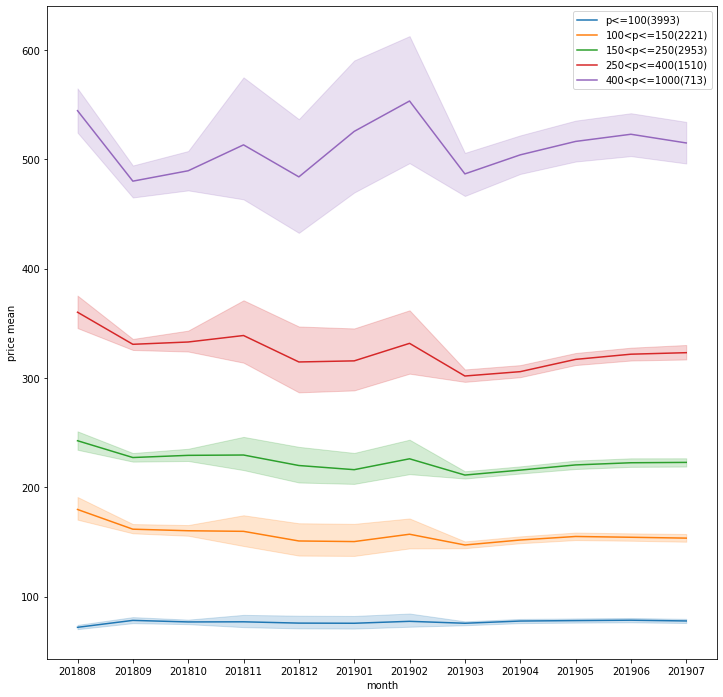

In [681]:
plt.figure(figsize=(12,12))

i=0
for t in tiers[:5]:
    sns.lineplot(x='month',y = 'price',data=t,label=labels[i])
    i+=1
plt.ylabel('price mean');

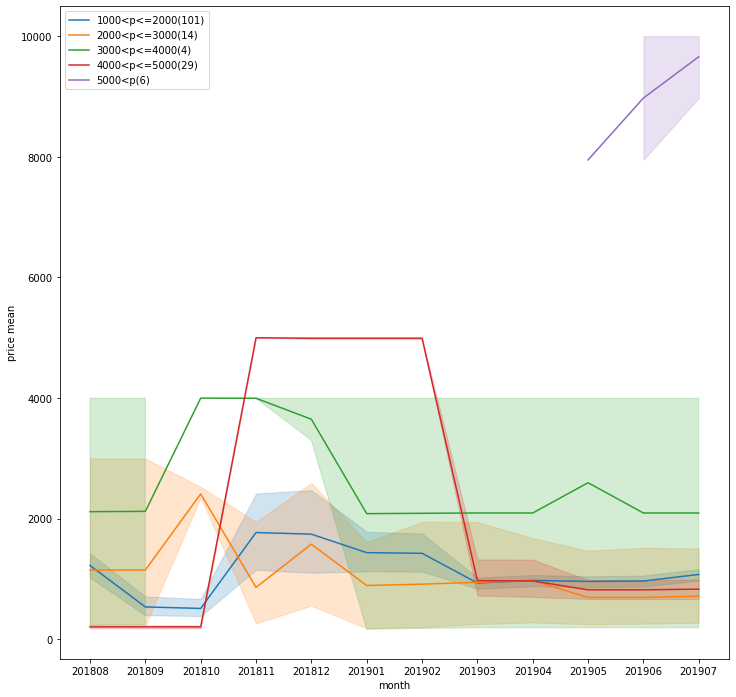

In [682]:
plt.figure(figsize=(12,12))

i=5
for t in tiers[i:]:
    sns.lineplot(x='month',y = 'price',data=t,label=labels[i])
    i+=1
plt.ylabel('price mean');

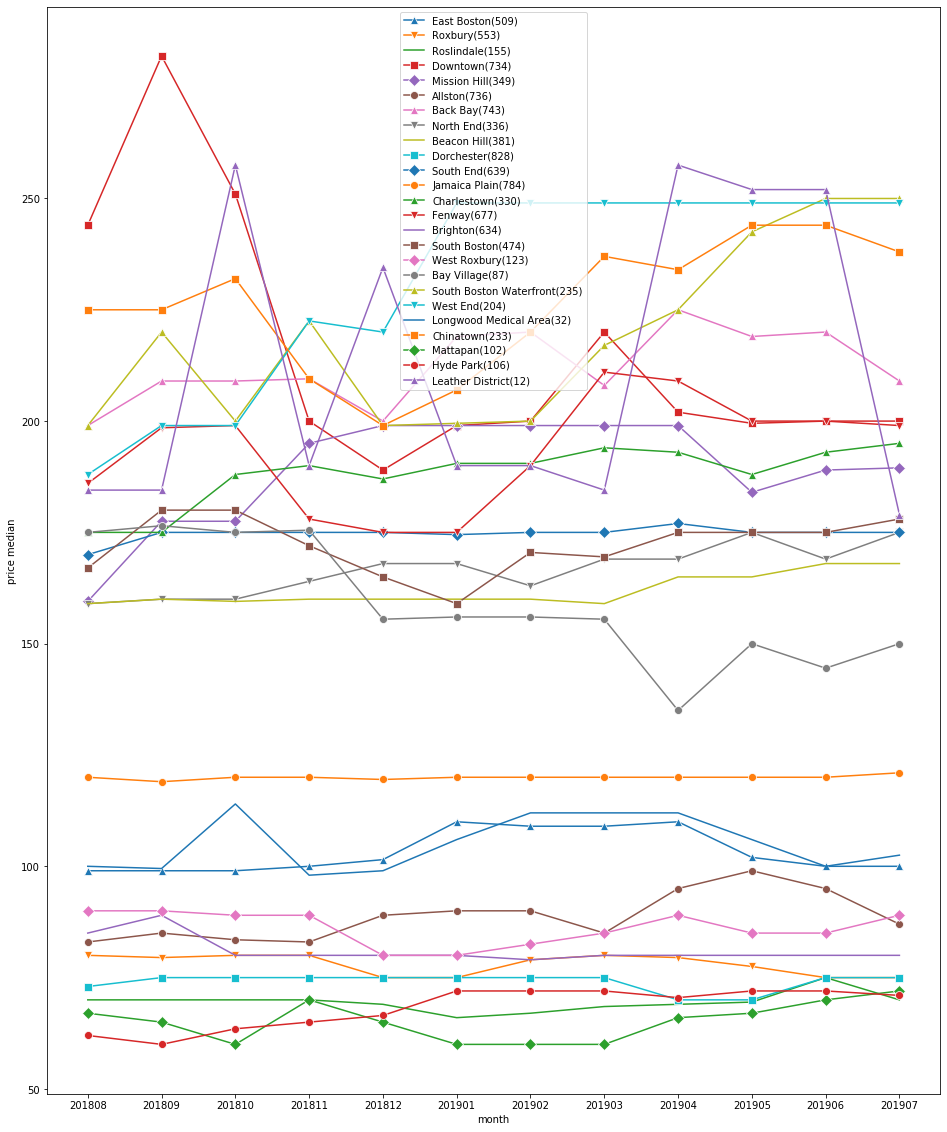

In [720]:
# neighbourhood pricing median
# try plotly??
plt.figure(figsize=(16,20))
markers=[
    '^','v','','s','D','o',
    '^','v','','s','D','o',
    '^','v','','s','D','o',
    '^','v','','s','D','o',
    '^','v','','s','D','o',]

df = price_bos_12m
         

i=0
for nb in df.neighbourhood.unique():
    ids = df[df.neighbourhood==nb].id.unique()
    nb_df = df[df.id.isin(ids)].groupby(['month']).price.median().reset_index()
    nb_df['neighbourhood'] = nb
    sns.lineplot(x='month',y = 'price',data=nb_df,label=nb+'('+str(len(ids))+')',marker=markers[i],markersize=8)
    i+=1
plt.ylabel('price median');

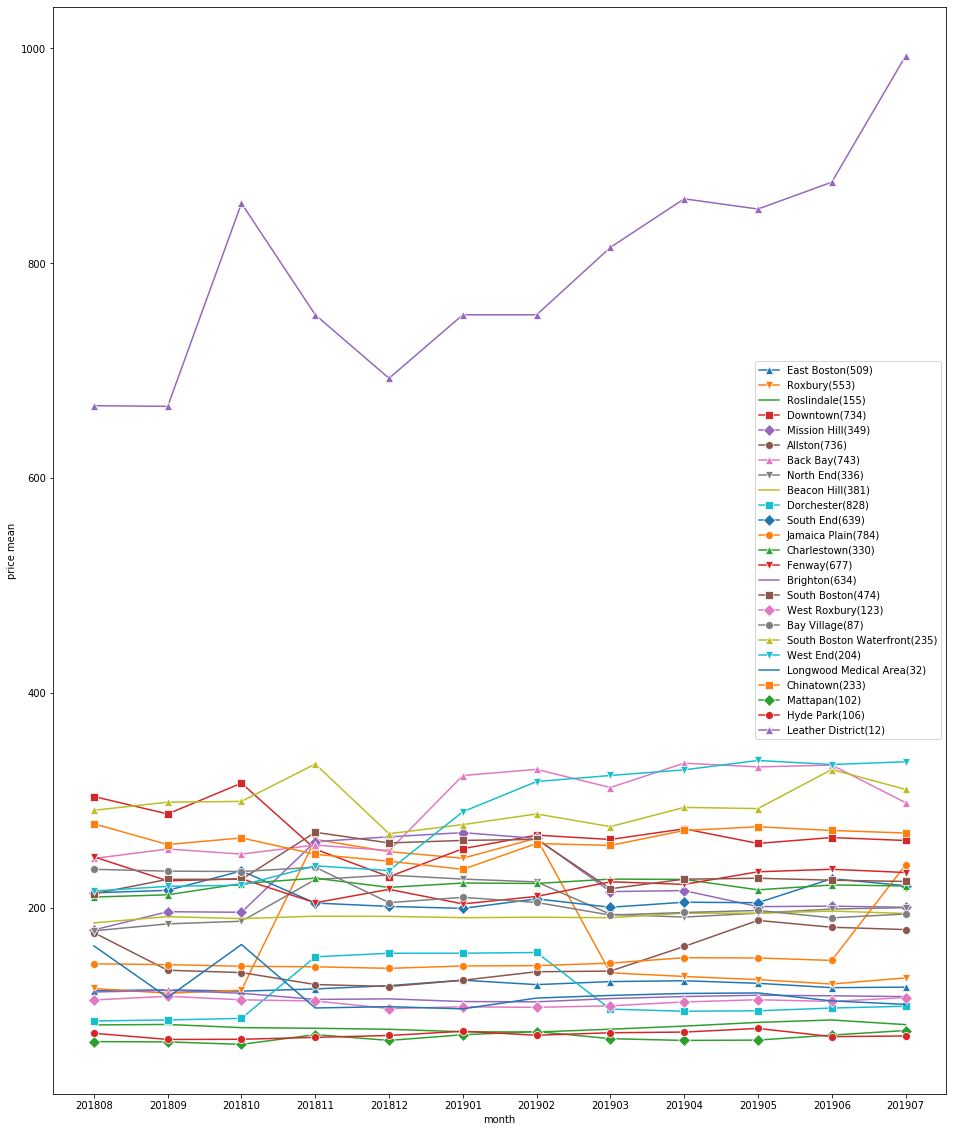

In [721]:
# neighbourhood pricing mean
plt.figure(figsize=(16,20))
markers=[
    '^','v','','s','D','o',
    '^','v','','s','D','o',
    '^','v','','s','D','o',
    '^','v','','s','D','o',
    '^','v','','s','D','o',]

df = price_bos_12m
         

i=0
for nb in df.neighbourhood.unique():
    ids = df[df.neighbourhood==nb].id.unique()
    nb_df = df[df.id.isin(ids)].groupby(['month']).price.mean().reset_index()
    nb_df['neighbourhood'] = nb
    sns.lineplot(x='month',y = 'price',data=nb_df,label=nb+'('+str(len(ids))+')',marker=markers[i],markersize=8)
    i+=1
plt.ylabel('price mean');

In [723]:
nb_df

month       price     neighbourhood
0   201808  667.125000  Leather District
1   201809  666.500000  Leather District
2   201810  855.500000  Leather District
3   201811  751.714286  Leather District
4   201812  692.625000  Leather District
5   201901  751.714286  Leather District
6   201902  751.714286  Leather District
7   201903  814.500000  Leather District
8   201904  859.666667  Leather District
9   201905  850.166667  Leather District
10  201906  875.166667  Leather District
11  201907  992.600000  Leather District

In [743]:
df.neighbourhood.unique()

array(['East Boston', 'Roxbury', 'Roslindale', 'Downtown', 'Mission Hill',
       'Allston', 'Back Bay', 'North End', 'Beacon Hill', 'Dorchester',
       'South End', 'Jamaica Plain', 'Charlestown', 'Fenway', 'Brighton',
       'South Boston', 'West Roxbury', 'Bay Village',
       'South Boston Waterfront', 'West End', 'Longwood Medical Area',
       'Chinatown', 'Mattapan', 'Hyde Park', 'Leather District'],
      dtype=object)

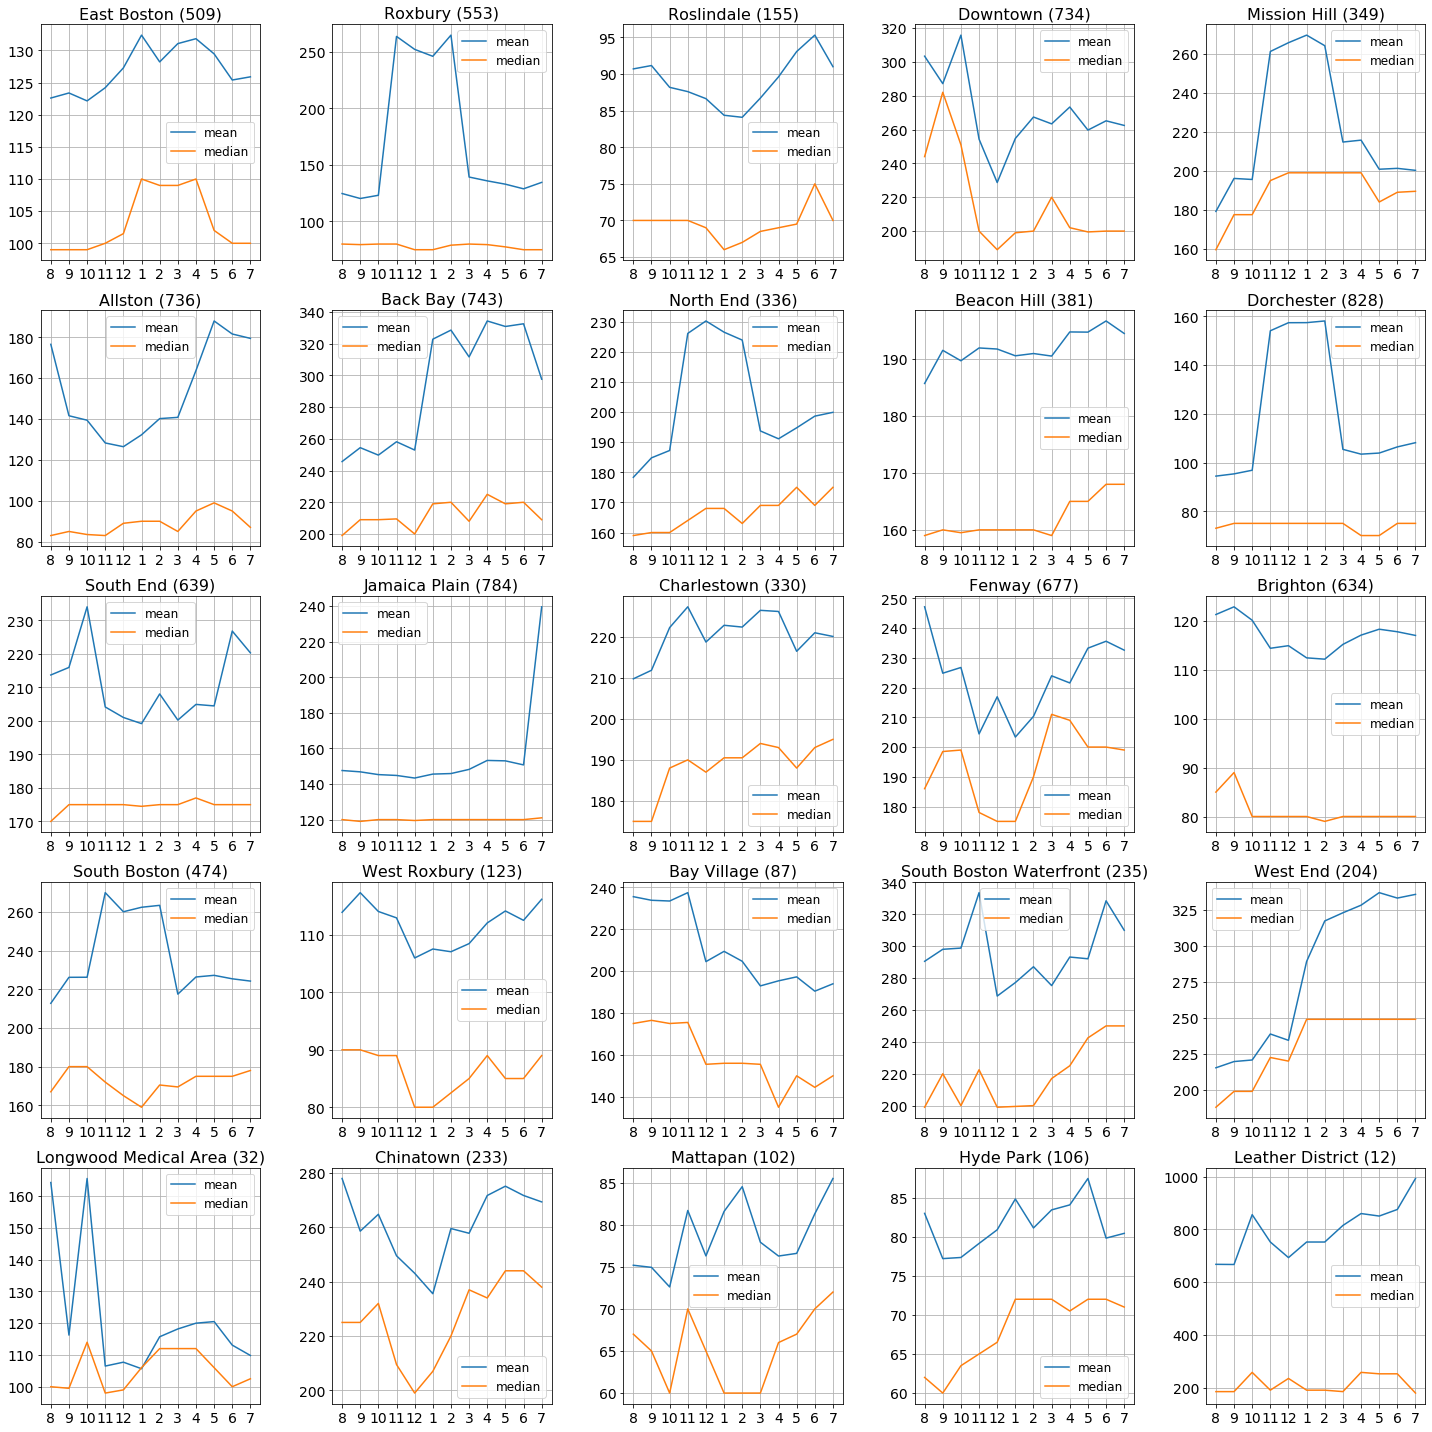

In [774]:
df = price_bos_12m

fig, axs = plt.subplots(nrows=5, ncols=5,figsize=(20, 20))

axes = []
for i in range(5):
    for j in range(5):
        axes.append(axs[i,j])
n=0

for nb in df.neighbourhood.unique():
    ids = df[df.neighbourhood==nb].id.unique()
    nb_df_mean = df[df.id.isin(ids)].groupby(['month']).price.mean().reset_index()
    nb_df_median = df[df.id.isin(ids)].groupby(['month']).price.median().reset_index()

    ax = axes[n]
    ax.plot(nb_df_mean.month, nb_df_mean.price,label='mean')
    ax.plot(nb_df_median.month, nb_df_median.price,label='median')
    ax.set_xticklabels([8,9,10,11,12,1,2,3,4,5,6,7])
    ax.tick_params(labelsize=14)
    ax.set_title(nb+' ('+str(len(ids))+')',fontsize=16)
    ax.grid(True)
    ax.legend(fontsize=12)
    n+=1
plt.tight_layout()  
# fig # for jupyter notebook calling fig is not necessary

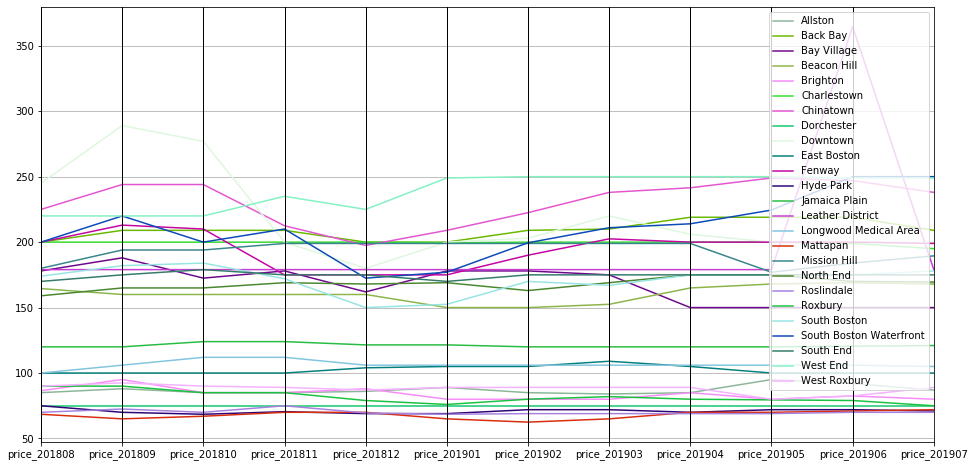

In [31]:
from pandas.plotting import parallel_coordinates

df_id_nb = listings.groupby(['id','neighbourhood_cleansed']).price.mean().reset_index().drop('price', axis=1)
df_pc = price_all_h.merge(df_id_nb,on='id')
df_pc_median = df_pc.drop('id',axis=1).groupby('neighbourhood_cleansed').median().reset_index()
df_pc_mean = df_pc.drop('id',axis=1).groupby('neighbourhood_cleansed').mean().reset_index()

plt.figure(figsize=(16,8))
parallel_coordinates(df_pc_median, 'neighbourhood_cleansed');

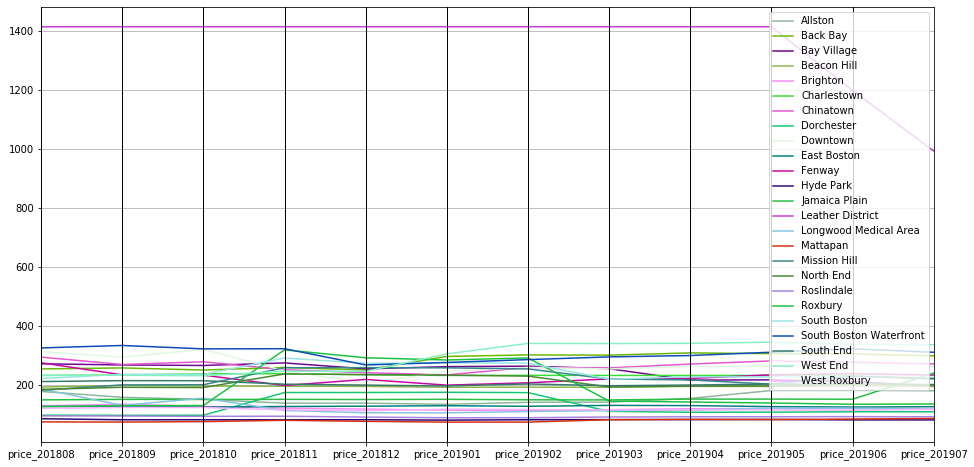

In [32]:
plt.figure(figsize=(16,8))
parallel_coordinates(df_pc_mean, 'neighbourhood_cleansed');

In [33]:
df_pc_mean

neighbourhood_cleansed  price_201808  price_201809  price_201810  \
0                   Allston    177.105769    157.198157    149.954128   
1                  Back Bay    253.471154    256.839009    249.711712   
2               Bay Village    270.941176    266.888889    265.166667   
3               Beacon Hill    191.930108    197.284211    195.427807   
4                  Brighton    128.077982    133.872727    126.201613   
5               Charlestown    231.274336    232.745763    236.871795   
6                 Chinatown    293.484211    268.515464    277.700000   
7                Dorchester     96.568528     96.180905     96.341289   
8                  Downtown    312.283019    293.079710    320.312727   
9               East Boston    125.597990    126.641791    124.013761   
10                   Fenway    274.490323    233.357595    232.445141   
11                Hyde Park     84.428571     80.958333     81.041667   
12            Jamaica Plain    148.517906    150.137466    149.984252   
13         Leather District   1414.333333   1414.333333   1414.333333   
14    Longwood Medical Area    185.857143    129.750000    154.222222   
15                 Mattapan     73.735294     73.162162     74.666667   
16             Mission Hill    181.098160    199.307692    199.881657   
17                North End    183.818182    191.172249    190.251163   
18               Roslindale     94.137931     93.800000     92.561798   
19                  Roxbury    125.828829    128.431111    129.327660   
20             South Boston    220.769565    235.079498    234.755187   
21  South Boston Waterfront    324.620690    333.096774    321.515152   
22                South End    210.541219    213.724252    213.411003   
23                 West End    231.912621    232.028037    230.240741   
24             West Roxbury    119.640000    122.660000    122.313725   

    price_201811  price_201812  price_201901  price_201902  price_201903  \
0     137.278539    137.493450    133.304721    140.193277    140.767932   
1     258.495652    249.815562    295.826446    300.983827    300.237467   
2     273.842105    253.714286    261.190476    262.904762    254.260870   
3     194.697436    194.181818    191.206897    191.488263    191.129630   
4     120.392727    117.300366    113.470588    112.880546    115.107023   
5     237.285714    233.539683    231.338462    231.748092    231.380597   
6     250.814815    240.875000    233.225225    258.577586    256.967213   
7     173.400458    173.547297    174.233996    173.048889    109.429167   
8     246.887850    205.285319    244.519894    258.306069    253.454338   
9     125.982609    127.043478    128.672000    126.606061    129.771536   
10    197.231481    217.837349    198.450000    206.368421    219.491329   
11     80.820000     81.142857     79.708333     81.040816     81.489796   
12    150.175573    149.579602    150.279412    148.719424    148.281623   
13   1414.333333   1414.333333   1414.333333   1414.333333   1414.333333   
14    112.444444    104.500000    104.500000    109.000000    111.700000   
15     79.191489     75.640000     72.942308     73.038462     81.109091   
16    257.595376    257.728324    257.114286    253.458101    219.316667   
17    236.478873    234.462617    232.463964    229.027907    192.290749   
18     93.021505     90.032609     87.781250     87.896907     90.333333   
19    318.116466    291.288321    283.734043    290.766187    144.351916   
20    290.434783    272.618705    274.207746    272.996516    218.236301   
21    322.029412    266.833333    275.404255    285.065217    294.297872   
22    201.748485    198.543284    195.685131    202.398256    196.454802   
23    245.783333    245.115702    304.544000    340.000000    339.574627   
24    114.581818    111.410714    117.052632    115.807018    114.118644   

    price_201904  price_201905  price_201906  price_201907  
0     153.448669    180.247458    180.553055    179.488372  
1     3

In [6]:
df_pt_mean = pd.pivot_table(listings, values='price', index='room_type',columns=['neighbourhood_cleansed'], aggfunc=np.mean)
df_pt_mean = df_pt_mean.drop('Leather District', axis=1)
# df_pt_median = pd.pivot_table(listings, values='price', index='room_type',columns=['neighbourhood_cleansed'], aggfunc=np.median)
# df_pt_median = df_pt_median.drop('Leather District', axis=1)

In [566]:
df_pt_mean.replace(0.0,np.nan)

neighbourhood_cleansed     Allston    Back Bay  Bay Village  Beacon Hill  \
room_type                                                                  
Entire home/apt         261.780822  318.784810   274.565217   203.789474   
Private room            120.211340  133.862745   119.800000   123.857143   
Shared room              50.750000         NaN          NaN    50.000000   

neighbourhood_cleansed    Brighton  Charlestown   Chinatown  Dorchester  \
room_type                                                                 
Entire home/apt         184.518750   255.626168  295.196850  212.344371   
Private room             66.270531   146.942308  104.142857   71.472813   
Shared room              48.750000          NaN   69.750000   71.500000   

neighbourhood_cleansed    Downtown  East Boston      Fenway   Hyde Park  \
room_type                                                                 
Entire home/apt         279.830549   173.519774  256.703704  114.714286   
Private room            170.550725    76.000000  122.130435   63.285714   
Shared room              71.444444    52.500000  198.333333         NaN   

neighbourhood_cleansed  Jamaica Plain  Longwood Medical Area    Mattapan  \
room_type                                                                  
Entire home/apt            222.224638                  141.0  139.055556   
Private room               265.423256                   86.0   64.066667   
Shared room                 57.500000                   87.0         NaN   

neighbourhood_cleansed  Mission Hill   North End  Roslindale     Roxbury  \
room_type                                                                  
Entire home/apt           284.123188  207.702703  143.536585  267.361538   
Private room               65.934211  115.100000   62.293333   67.013043   
Shared room                29.750000         NaN         NaN   31.117647   

neighbourhood_cleansed  South Boston  South Boston Waterfront   South End  \
room_type                                                                   
Entire home/apt           266.902128               319.133929  239.029499   
Private room              116.266667               165.333333  123.000000   
Shared room                73.500000               150.000000   86.000000   

neighbourhood_cleansed    West End  West Roxbury  
room_type                                         
Entire home/apt         363.561538    177.108108  
Private room             93.933333     65.372093  
Shared room                    NaN     50.000000

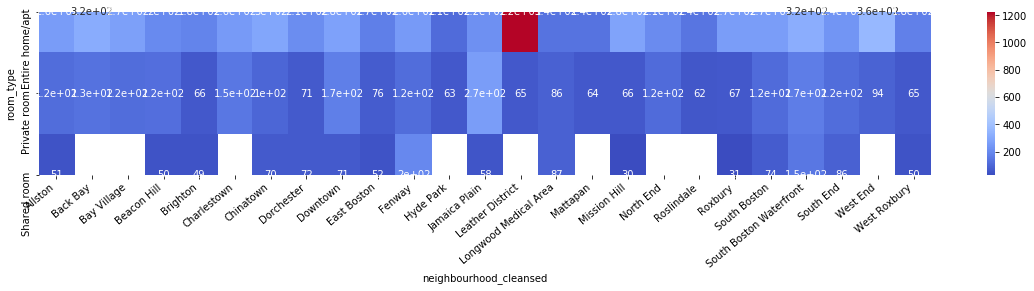

In [341]:
plt.figure(figsize=(20,3))
ax = sns.heatmap(df_pt,annot=True, cmap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


In [571]:
# heatmap implementation

import matplotlib

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return text

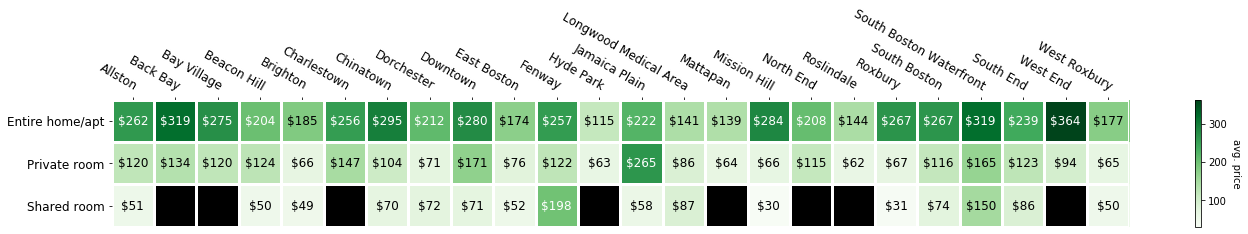

In [644]:
a = df_pt_mean.values
a = np.ma.masked_where(a == 0, a)
c_map = plt.get_cmap('Greens')

fig, ax = plt.subplots(figsize=(20,3))
ax.tick_params(labelsize=12)
im, cbar = heatmap(a, df_pt_mean.index, df_pt_mean.columns, ax=ax,
                   cmap=c_map, cbarlabel="avg. price")
texts = annotate_heatmap(im, valfmt="${x:.0f}",fontsize=12)

fig.tight_layout()
plt.show();

In [577]:
c_map.set_bad

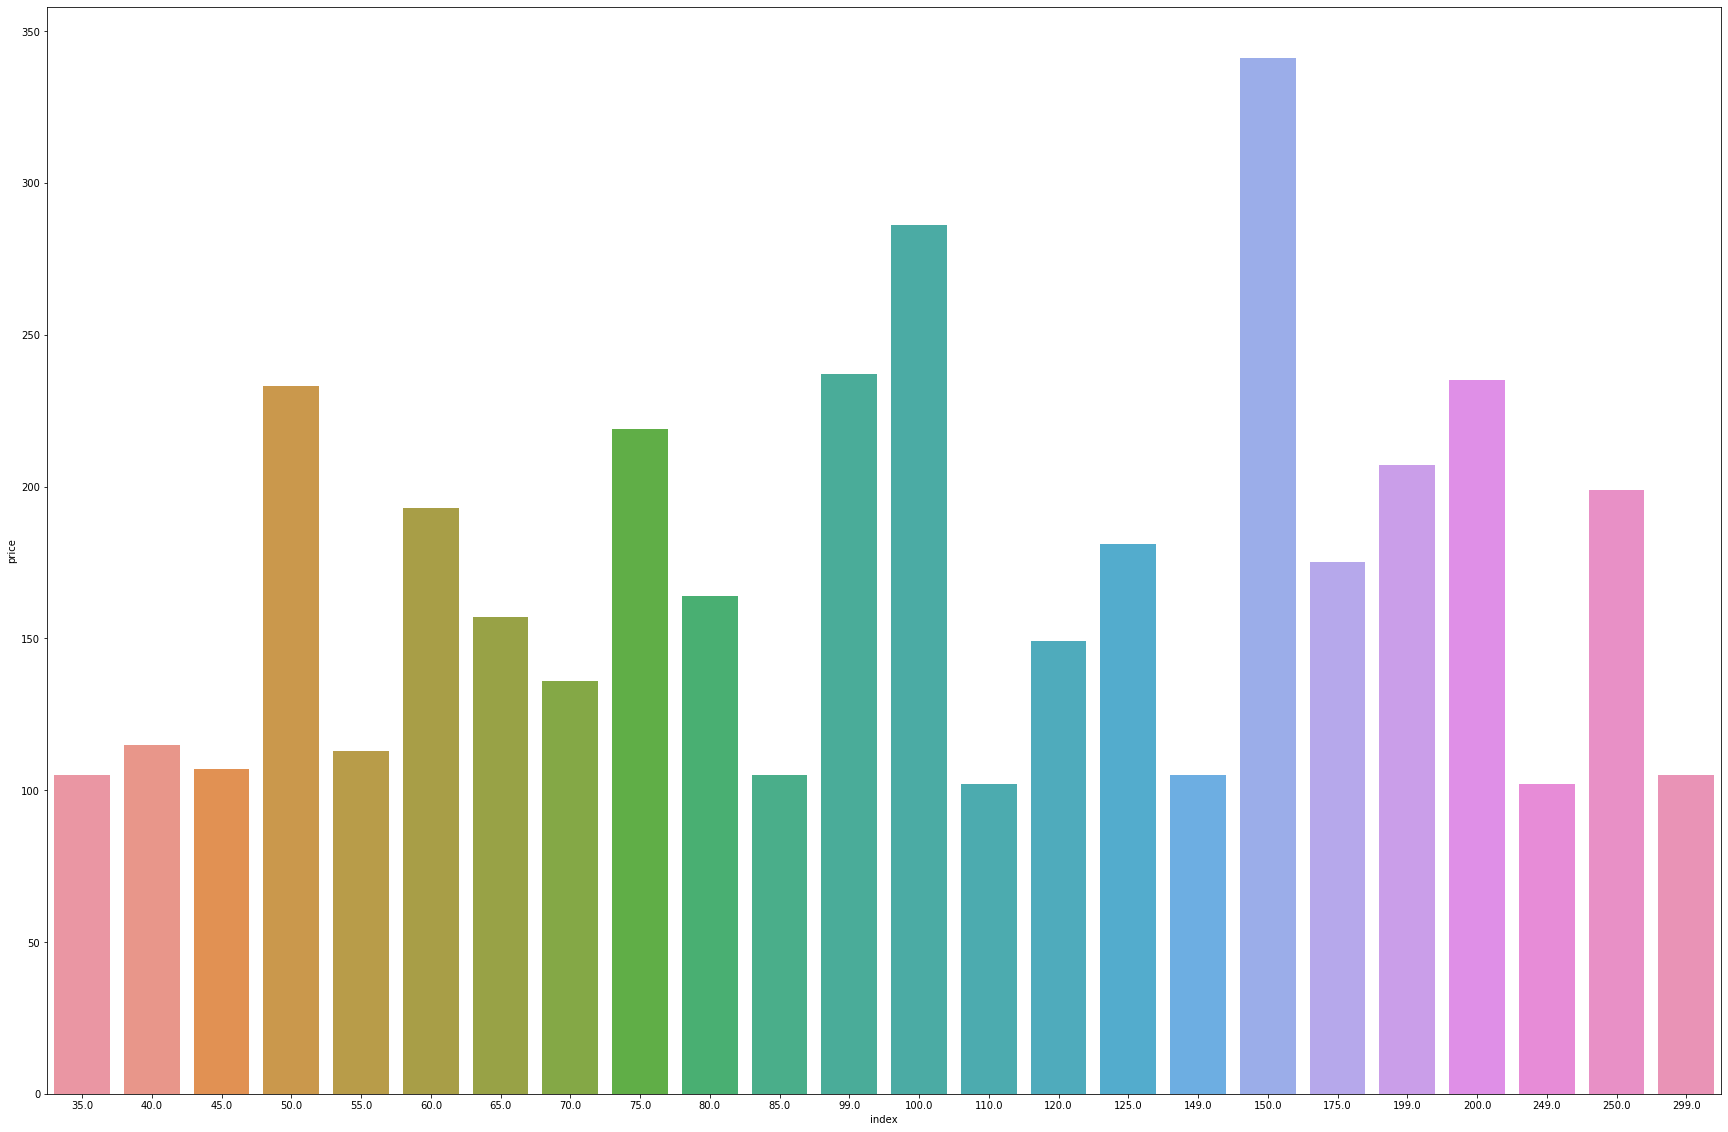

In [171]:
# p_d = pd.DataFrame(df_by_id.price.value_counts().sort_index().reset_index())
# p_d.rename(columns={"index": "price", "price": "counts"})
# plt.figure(figsize=(30,20))
# sns.barplot('index','price', data = p_d[p_d.price>100])

## NEIGHBORHOOD

In [34]:
# all the neighbourhood columns
listings[['neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','neighborhood_overview']].head(5)

neighbourhood neighbourhood_cleansed  neighbourhood_group_cleansed  \
0   East Boston            East Boston                           NaN   
1       Roxbury                Roxbury                           NaN   
2       Roxbury                Roxbury                           NaN   
3    Roslindale             Roslindale                           NaN   
4   Beacon Hill               Downtown                           NaN   

                               neighborhood_overview  
0  Mostly quiet ( no loud music, no crowed sidewa...  
1  Peacful, Architecturally interesting, historic...  
2  Peaceful, Architecturally interesting, histori...  
3  The LOCATION: Roslindale is a safe and diverse...  
4  Beacon Hill is a historic neighborhood filled ...

In [35]:
# neighbourhood_group_cleansed is a empty column
listings.neighbourhood_group_cleansed.value_counts()

Series([], Name: neighbourhood_group_cleansed, dtype: int64)

### neighborhood | neighborhood_cleansed

In [36]:
#30 unique values from colum neighborhood
neighborhood = set(listings.neighbourhood.value_counts().index) 
print('{} unique values from colum neighborhood'.format(len(listings.neighbourhood.unique())))
listings.neighbourhood.value_counts()

30 unique values from colum neighborhood


Allston-Brighton      703
Dorchester            575
Back Bay              496
Jamaica Plain         492
South Boston          445
South End             410
Fenway/Kenmore        407
Roxbury               388
Downtown              360
East Boston           349
Beacon Hill           275
North End             244
Mission Hill          225
West End              198
Charlestown           152
Roslindale            117
Chinatown             110
West Roxbury           80
Hyde Park              63
Mattapan               53
Theater District       40
Downtown Crossing      35
Government Center      11
Financial District     11
Brookline               9
Somerville              5
Leather District        5
Chestnut Hill           3
Cambridge               2
Everett                 1
Name: neighbourhood, dtype: int64

In [37]:
# 25 unique values from colum neighborhood_cleansed
neighborhood_cleansed = set(listings.neighbourhood_cleansed.value_counts().index)
print('{} unique values from colum neighborhood_cleansed'.format(len(listings.neighbourhood_cleansed.unique())))
listings.neighbourhood_cleansed.value_counts()

25 unique values from colum neighborhood_cleansed


Dorchester                 580
Downtown                   497
Jamaica Plain              495
Back Bay                   446
South End                  403
Fenway                     399
Roxbury                    377
Brighton                   371
East Boston                349
Allston                    344
South Boston               327
Beacon Hill                257
North End                  242
Mission Hill               222
Charlestown                159
Chinatown                  145
West End                   145
South Boston Waterfront    119
Roslindale                 116
West Roxbury                81
Mattapan                    63
Hyde Park                   63
Bay Village                 48
Longwood Medical Area       11
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [38]:
# neigbourhood intersect neibourhood_cleansed #19
neighborhood.intersection(neighborhood_cleansed)
# neighborhood.symmetric_difference(neighborhood_cleansed) #17

{'Back Bay',
 'Beacon Hill',
 'Charlestown',
 'Chinatown',
 'Dorchester',
 'Downtown',
 'East Boston',
 'Hyde Park',
 'Jamaica Plain',
 'Leather District',
 'Mattapan',
 'Mission Hill',
 'North End',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South End',
 'West End',
 'West Roxbury'}

In [39]:
# unique in neighborhood vs neighborhood_cleansed
neighborhood - neighborhood_cleansed #11

{'Allston-Brighton',
 'Brookline',
 'Cambridge',
 'Chestnut Hill',
 'Downtown Crossing',
 'Everett',
 'Fenway/Kenmore',
 'Financial District',
 'Government Center',
 'Somerville',
 'Theater District'}

In [40]:
# unique in neighborhood_cleansed vs neighborhood
neighborhood_cleansed - neighborhood #6

{'Allston',
 'Bay Village',
 'Brighton',
 'Fenway',
 'Longwood Medical Area',
 'South Boston Waterfront'}

In [41]:
# neighborhood_overview is provided by listing hosts not by Airbnb
listings[(listings.neighbourhood != listings.neighbourhood_cleansed)& (listings.neighborhood_overview.isna() == False)]\
[['neighbourhood','neighbourhood_cleansed','neighborhood_overview']].head(10)

neighbourhood neighbourhood_cleansed  \
4          Beacon Hill               Downtown   
5          Beacon Hill               Downtown   
67            Back Bay            Bay Village   
70   Downtown Crossing               Downtown   
117  Government Center               Downtown   
130     Fenway/Kenmore                 Fenway   
167   Allston-Brighton               Brighton   
171            Roxbury             Dorchester   
187   Allston-Brighton               Brighton   
191   Allston-Brighton               Brighton   

                                 neighborhood_overview  
4    Beacon Hill is a historic neighborhood filled ...  
5    Beacon Hill is located downtown and is conveni...  
67   Home is right in the heart of Boston, few minu...  
70   It is close to everything! Proximity to so man...  
117  The apartment is in the best location in town....  
130  The apartment is located in an EXTREMELY CONVE...  
167  Nice restaurants, fun bars and stores in walki...  
171  The following Points of Interest are among the...  
187  Quiet yet very centrally located the Oak Squar...  
191  SAFE!! Brighton is an amazing neighborhood of ...

### Plotting neighbourhoods

let's try **scatterplot**
- no underlying map
- with so many neighbourhoods it's hard to distinguish them with just the legend reference
- can somehow see the density from the plot

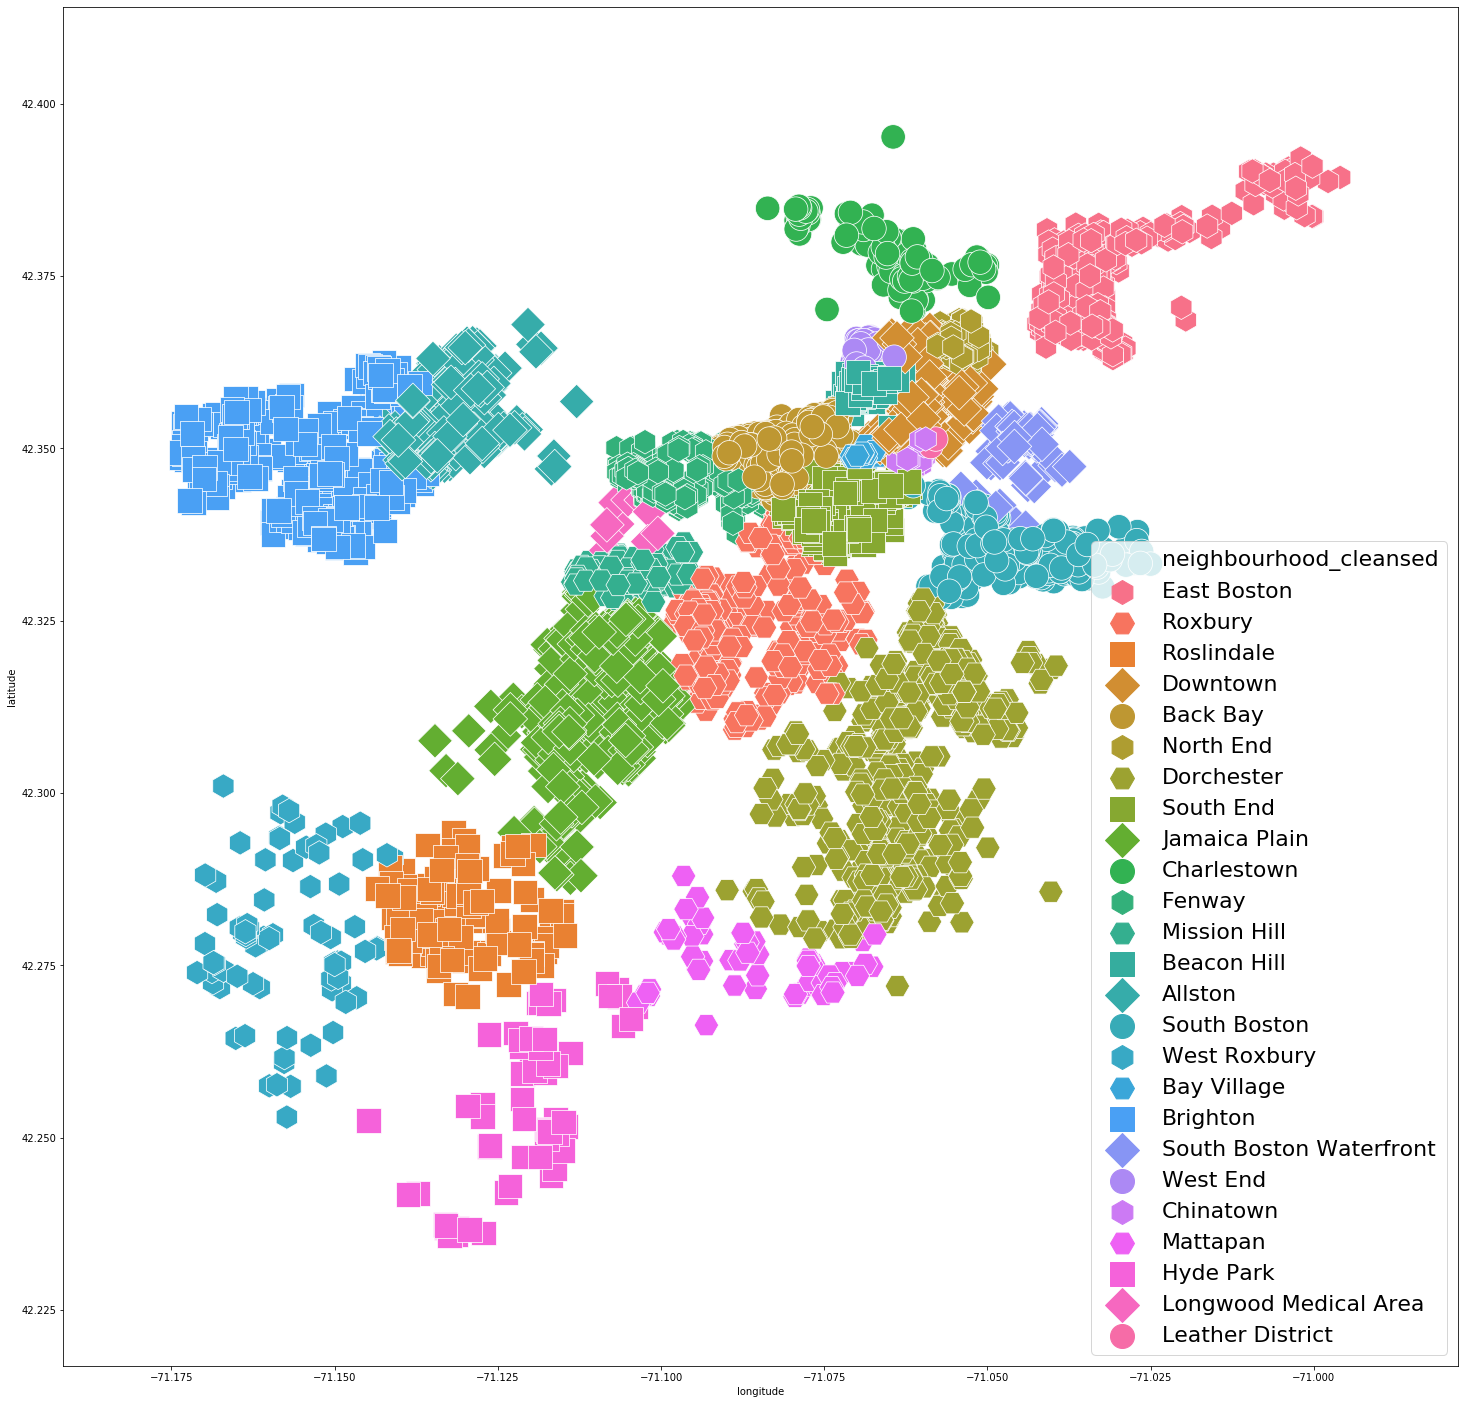

In [102]:
plt.figure(figsize=(25,25))
markers=[
    'h','H','s','D','o',
    'h','H','s','D','o',
    'h','H','s','D','o',
    'h','H','s','D','o',
    'h','H','s','D','o']

sns.scatterplot('longitude','latitude', hue='neighbourhood_cleansed',style='neighbourhood_cleansed',
                markers=markers, data = listings, s = 600)
plt.legend(markerscale=4 , fontsize=22);

neighbourhoods are hard to plot with [**Basemap**](https://matplotlib.org/basemap/index.html) as well
- the tool is best for plotting at continent and county level **not enough detial at city level**
- we need to try something else

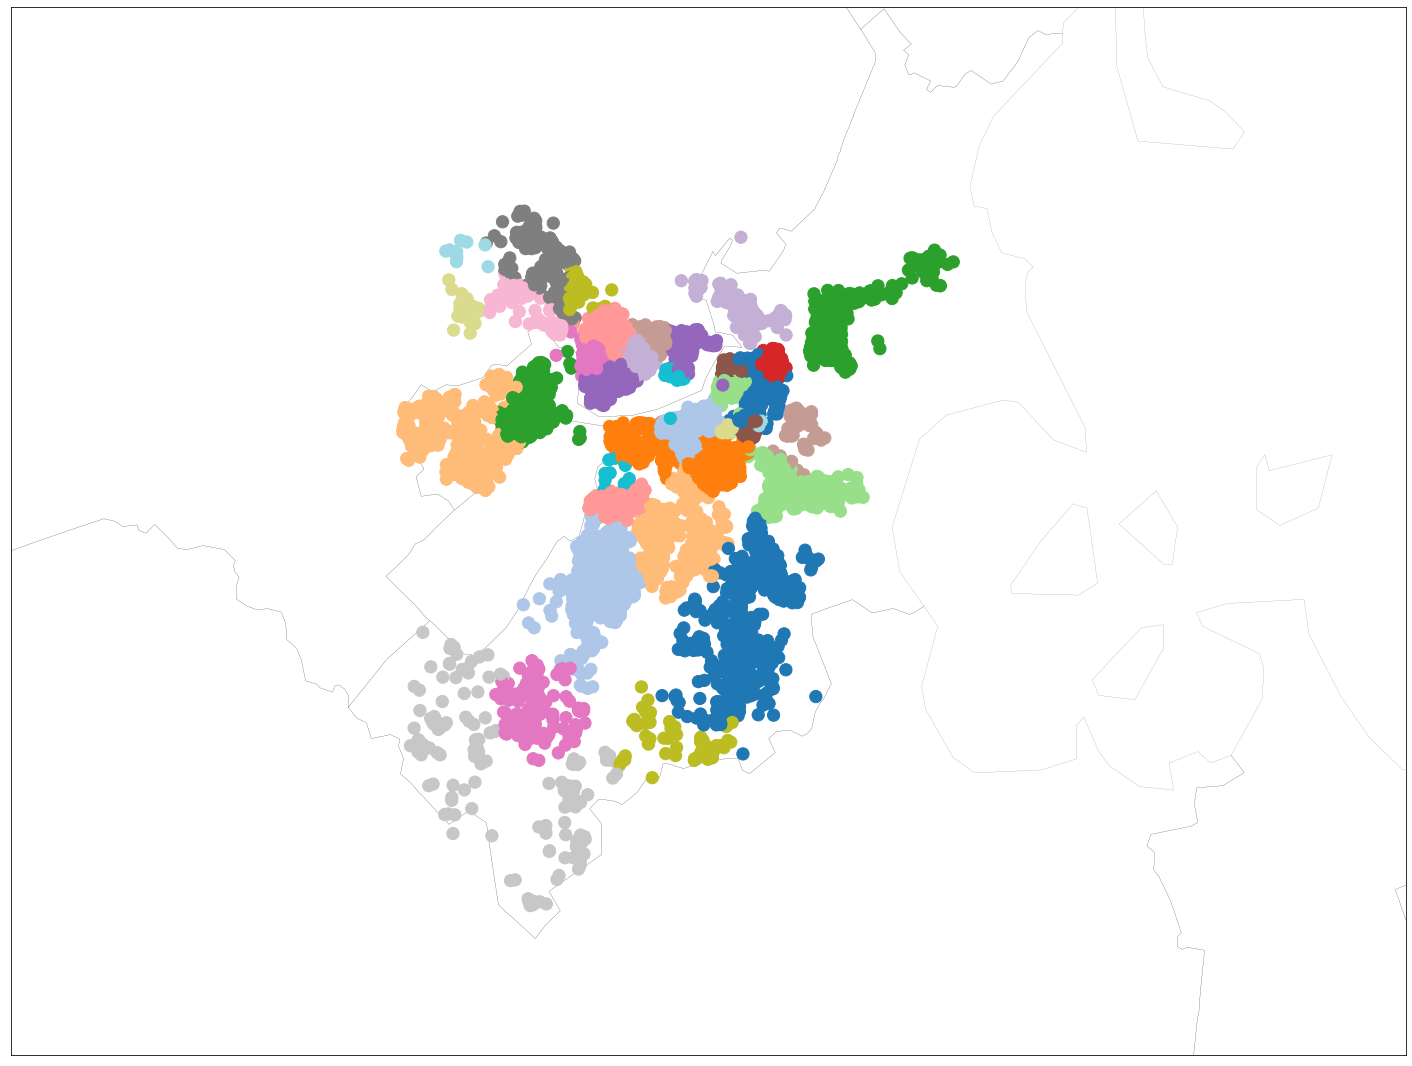

In [220]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(25,25))

# initialise the map & set boundaries
m = Basemap(llcrnrlat=42.20, llcrnrlon=-71.30, urcrnrlat=42.45, urcrnrlon=-70.85,projection='merc')
# Draws the US counties
m.drawcounties()

x,y = m(listings.longitude.values, listings.latitude.values)

df_c = pd.DataFrame(listings.neighbourhood_cleansed.value_counts(ascending=True))
df_c['color']=range(1,len(df_c)+1)

scat = m.scatter(x,y, s=150, c = listings.neighbourhood_cleansed.apply(lambda x: df_c.loc[x].color), cmap='tab20_r')

# # colors = {'Entire home/apt':'tab:green', 'Private room':'tab:blue', 'Shared room':'tab:red'}
# colors = {'Entire home/apt':'tab:red', 'Private room':'tab:green', 'Shared room':'c'}

# scat = m.scatter(x,y, s=12,c = listings.room_type.apply(lambda x: colors[x]), alpha=0.6)

plt.show()

### [gmaps](https://jupyter-gmaps.readthedocs.io/en/latest/) come to the rescue

- it is interactive
- it requires a Google API key, but the key is not something meant to be shared
- if you have a Google API key, use your own down below

- This is how it looks like, if the cell below doesn't run

![](../img/heatmap.png)

In [3]:
import gmaps
# Read Your Google API key from a local file
with open('../../GCP_API_Key.txt', 'r') as f:
    gmaps.configure(api_key=f.read()) 

# configure a gmaps fig
figure_layout = {'width': '1000px','height': '1000px'}
bos_center = (42.315, -71.04)
fig = gmaps.figure(layout = figure_layout, center=bos_center, zoom_level=13.25)

# load a Numpy array of (latitude, longitude) pairs, also accepts df columns
locs = list(zip(listings.latitude, listings.longitude))
# locs = list(zip(df_by_id.latitude, df_by_id.longitude)) # visually almost identical to above July data plot

fig.add_layer(gmaps.heatmap_layer(locs, gradient=[(0,0,0,0),'blue','yellow','red']))
# fig.add_layer(gmaps.heatmap_layer(locs))
fig

Figure(layout=FigureLayout(height='1000px', width='1000px'))

In [15]:
# # Exporting the map to HTML so we can screenshot the image in larger size
# from ipywidgets.embed import embed_minimal_htmlIIif
# embed_minimal_html('export.html', views=[fig])

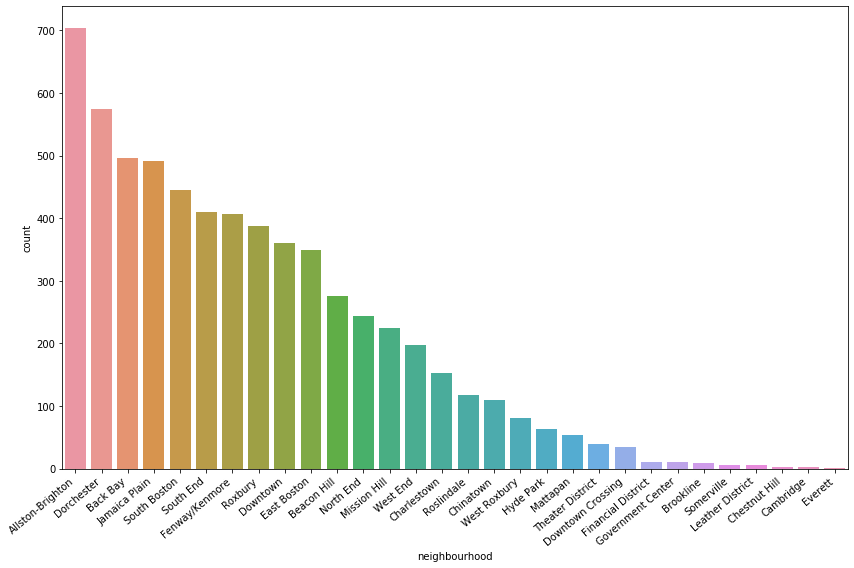

In [23]:
# listing counts by neighbourhood
plt.figure(figsize=(12,8))
ax = sns.countplot(x='neighbourhood',data=listings,
                   order=listings.neighbourhood.value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

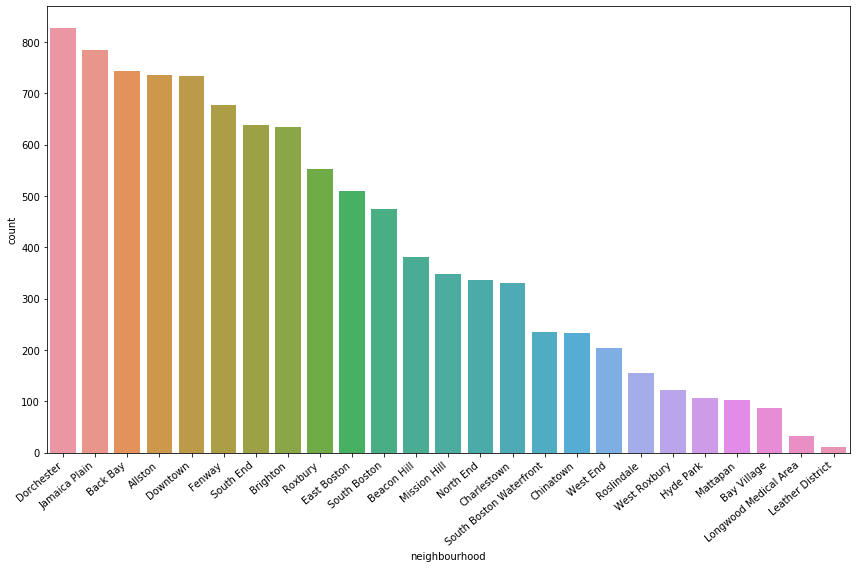

In [256]:
# listing counts by neighbourhood
plt.figure(figsize=(12,8))
ax = sns.countplot(x='neighbourhood',data=df_by_id_nb,
                   order=df_by_id_nb.neighbourhood.value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [650]:
df_by_id_nb.head()

id neighbourhood   latitude  longitude  price
0  3781   East Boston  42.365241 -71.029361  125.0
1  5506       Roxbury  42.329809 -71.095595  145.0
2  6695       Roxbury  42.329941 -71.093505  169.0
3  6976    Roslindale  42.292438 -71.135765   65.0
4  8789      Downtown  42.359187 -71.062651   99.0

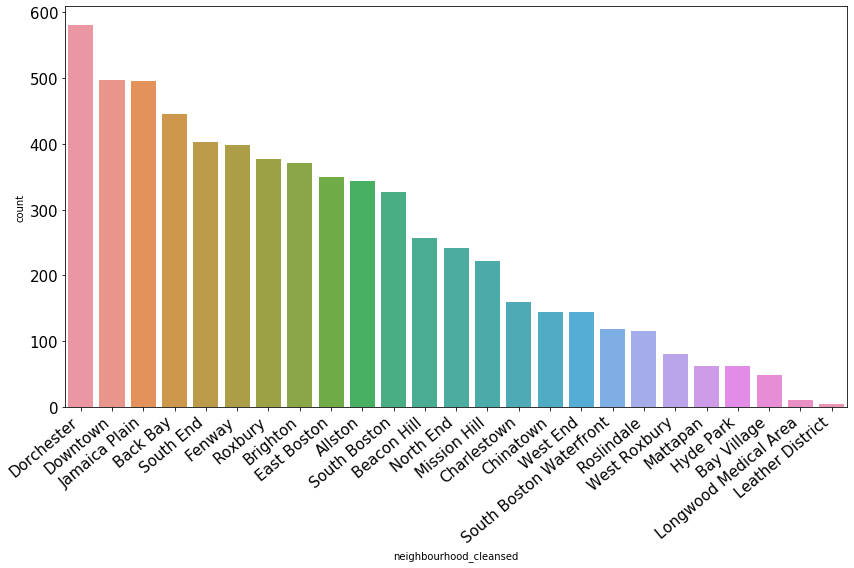

In [254]:
# listing counts by neighbourhood_cleansed
# Dorchrdter and Jamaica Plain have lots of listings but they are also very big
plt.figure(figsize=(12,8))
ax = sns.countplot(x='neighbourhood_cleansed',data=listings,
                   order=listings.neighbourhood_cleansed.value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=15)
ax.set_yticklabels([0,100,200,300,400,500,600],fontsize=15)
plt.tight_layout()
plt.show()

In [47]:
# # which neighbourhood has the most affordable avg.price
# ax = df_by_id_nb.groupby('neighbourhood').price.median().sort_values().plot.bar(figsize=(10,6))
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [653]:
# Some of the same listings recorded slitly different geocodes over 12 month
# resulting 58 listings have variance in neighbourhood
# df_by_id.shape[0], df_by_id_nb.shape[0],df_by_id_nb[df_by_id_nb.duplicated('id',False)].shape[0]/2
# Therefore need to unify the geocodes using the median, this is for calculating/assigning a t_station to the listing
df_by_id_nb = price_bos_12m.groupby(['id','neighbourhood']).median().reset_index()
df_by_id_nb.head()

id neighbourhood   latitude  longitude  price
0  3781   East Boston  42.365241 -71.029361  125.0
1  5506       Roxbury  42.329809 -71.095595  145.0
2  6695       Roxbury  42.329941 -71.093505  169.0
3  6976    Roslindale  42.292438 -71.135765   65.0
4  8789      Downtown  42.359187 -71.062651   99.0

In [142]:
# 58 listings have different geocode and variance in neighbourhood
df_by_id_nb[df_by_id_nb.duplicated('id',False)]

id            neighbourhood   latitude  longitude   price
169     611081              Charlestown  42.376690 -71.050310   325.0
170     611081              East Boston  42.381670 -71.039918   325.0
1412   8827268  South Boston Waterfront  42.349555 -71.049412   174.0
1413   8827268                South End  42.344302 -71.068997   174.0
2409  14586440              Beacon Hill  42.358370 -71.063130   179.0
2410  14586440                 Downtown  42.353231 -71.063822   179.0
2448  14760955              Beacon Hill  42.357140 -71.068589   143.0
2449  14760955                 Downtown  42.358940 -71.061640   143.0
3027  17144128                 Downtown  42.362678 -71.063681  1143.0
3028  17144128                 West End  42.362780 -71.063870  1171.0
4116  20696908                Chinatown  42.350359 -71.061208    99.0
4117  20696908                South End  42.344790 -71.066160    99.0
4977  22547331              Charlestown  42.373660 -71.052720   225.0
4978  22547331                 Downtown  42.358513 -71.055457   275.0
5065  22824621              Beacon Hill  42.357870 -71.062940   147.0
5066  22824621                 Downtown  42.355461 -71.060109   147.0
5268  23304928                 Back Bay  42.349860 -71.085000   209.0
5269  23304928                   Fenway  42.340699 -71.089289   209.0
5270  23305002                 Back Bay  42.349560 -71.084670   209.0
5271  23305002                   Fenway  42.340397 -71.088953   209.0
5817  24746941              Charlestown  42.374564 -71.050412   129.0
5818  24746941              East Boston  42.363216 -71.034184   129.0
6153  26028955  South Boston Waterfront  42.353800 -71.046820   250.0
6154  26028955                South End  42.344694 -71.063176   215.0
6175  26102579              East Boston  42.368030 -71.039930   186.0
6176  26102579                North End  42.365096 -71.051842   186.0
6177  26104302              East Boston  42.367620 -71.040140   186.0
6178  26104302                North End  42.364693 -71.052061   186.0
6180  26105250              East Boston  42.366980 -71.040610   186.0
6181  26105250                North End  42.363640 -71.052198   186.0
6285  26418311  South Boston Waterfront  42.353225 -71.046985   135.0
6286  26418311                South End  42.344240 -71.062343   120.0
6464  27107778                 Downtown  42.361190 -71.058381    80.0
6465  27107778               Roslindale  42.283889 -71.132050    80.0
6552  27404136                   Fenway  42.344854 -71.098467   295.0
6553  27404136             Mission Hill  42.334050 -71.102180   295.0
6622  27527176                Chinatown  42.351722 -71.059198   249.0
6623  27527176                 Downtown  42.353024 -71.057645   249.0
6715  27698940              Charlestown  42.375345 -71.049221   129.0
6716  27698940              East Boston  42.363943 -71.032894   129.0
6751  27778274              Charlestown  42.374913 -71.050611   129.0
6752  27778274              East Boston  42.363921 -71.033759   129.0
6753  27779216              Charlestown  42.374855 -71.050969   129.0
6754  27779216              East Boston  42.365231 -71.032655   129.0
6820  27950388              Charlestown  42.375572 -71.049519   129.0
6821  27950388              East Boston  42.363793 -71.033812   129.0
6942  28276988              Charlestown  42.375958 -71.049996   129.0
6943  28276988              East Boston  42.365363 -71.033162   129.0
6967  28341349                Chinatown  42.351522 -71.061300   129.0
6968  28341349                 Downtown  42.352909 -71.059334   149.0
8388  31403999                 Downtown  42.360410 -71.059400   297.0
8389  31403999            Jamaica Plain  42.329730 -71.112030   349.0
8397  31442241    Longwood Medical Area  42.335180 -71.104970    40.0
8398  31442241             Mission Hill  42.329700 -71.102230    40.0
8405  31480907                 Back Bay  42.351330 -71.075750    59.0
8406  31480907                 Downtown  42.352212 -71.065569    59.0
8533  32069080        

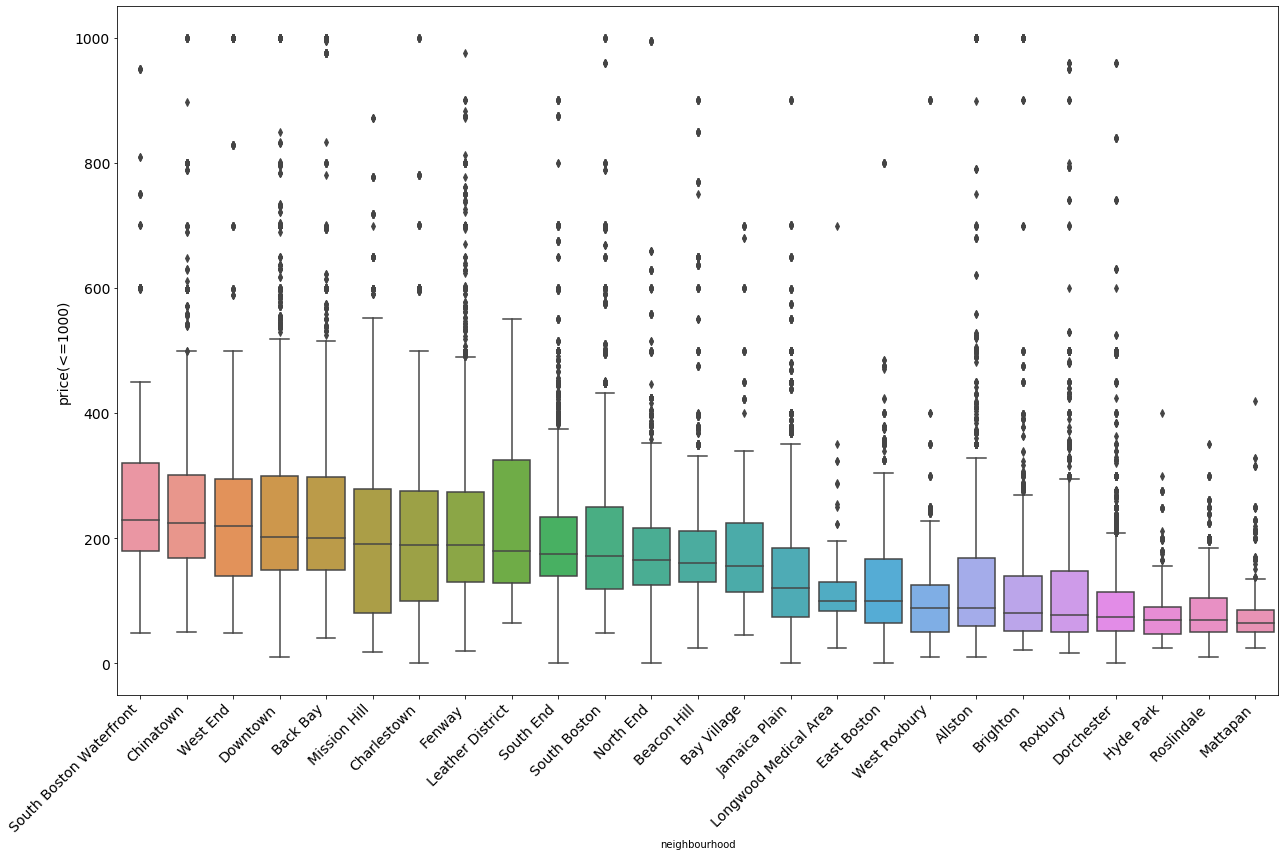

In [694]:
plt.figure(figsize=(18,12))
df = price_bos_12m[price_bos_12m.price<=1000]
ax = sns.boxplot(x='neighbourhood', y='price', data= df,orient='v',
                order=df.groupby('neighbourhood').median().price.sort_values(ascending=False).index);
ax.tick_params(labelsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");
plt.ylabel('price(<=1000)',fontsize=14);
plt.tight_layout()
plt.show()

# TRANSPORTATION

- like other metro citys Boston's T is huge part of people's lives
- let's see how it affects Airbnd listings

![](../img/T-map3.jpg)

In [132]:
# %%time # DO NOT REMOVE!!!

# # T stations

# redline = \
# 'Alewife,Davis,Porter,Harvard,Central,Kendall/MIT,Charles/MGH,Park Street,Downtown Crossing,South Station,Broadway,\
# Andrew,JFK/UMass,North Quincy,Wollaston,Quincy Center,Quincy Adams,Braintree,Savin Hill,Fields Corner,Shawmut,Ashmont'

# orangeline = \
# 'Oak Grove,Malden Center,Wellington,Assembly,Sullivan Square,Community College,North Station,Haymarket,State,\
# Downtown Crossing,Chinatown,Tufts Medical Center,Back Bay,Mass Ave,Ruggles,Roxbury Crossing,Jackson Square,\
# Stony Brook,Green Street,Forest Hills'

# greenline = \
# 'Lechmere,Science Park,North Station,Haymarket,Government Center,Park Street,Boylston,Arlington,Copley,Prudential,\
# Symphony,Northeastern University,Museum of Fine Arts,Longwood Medical Area,Brigham Circle,Fenwood Road,Mission Park,\
# Riverway,Back of the Hill,Heath Street,Hynes Convention Center,Kenmore,Fenway,Longwood,Brookline Village,\
# Brookline Hills,Beaconsfield,Reservoir,Chestnut Hill,Newton Centre,Newton Highlands,Eliot,Waban,Woodland,Riverside,\
# Saint Marys Street,Hawes Street,Kent Street,Saint Paul Street,Coolidge Corner,Summit Avenue,Brandon Hall,\
# Fairbanks Street,Washington Square,Tappan Street,Dean Road,Englewood Avenue,Cleveland Circle,Blandford Street,\
# Boston University East,Boston University Central,Boston University West,Saint Paul Street,Pleasant Street,\
# Babcock Street,Packards Corner,Harvard Avenue,Griggs Street,Allston Street,Warren Street,Washington Street,\
# Sutherland Road,Chiswick Road,Chestnut Hill Avenue,South Street,Boston College'

# blueline = \
# 'Wonderland,Revere Beach,Beachmont,Suffolk Downs,Orient Heights,Wood Island,Airport,Maverick,Aquarium,State,\
# Government Center,Bowdoin'

# silverline = \
# 'World Trade Center,Courthouse,South Station,Airport,Eastern Avenue,Box District,Bellingham Square,Chelsea,\
# Essex St @ Atlantic Ave,Temple Pl @ Washington St,Tremont St @ Boylston Station,Tufts Medical Center,\
# Washington St @ Herald St,Washington St @ E Berkeley St,Washington St @ Union Pk,Washington St @ W Newton St,\
# Washington St @ Worcester St,Washington St @ Massachusetts Ave,Washington St @ Lenox St,\
# Washington St @ Melnea Cass Blvd,Dudley Square'

# silverline_2 = \
# 'South Station,Courthouse Station,World Trade Center,Manulife Building,Northern Ave @ Harbor St,Northern Ave @ Tide St,\
# 23 Drydock Ave,27 Drydock Ave,Drydock Ave @ Black Falcon Ave,88 Black Falcon,Drydock Ave @ Design Center Place'

# redline = redline.split(',')
# orangeline = orangeline.split(',')
# greenline = greenline.split(',')
# blueline = blueline.split(',')
# silverline_2 = silverline_2.split(',')
# t_stations = list(set(redline+orangeline+greenline+blueline+silverline_2))
# len(t_stations)

# import googlemaps

# # Read Your Google API key from a local file
# with open('../../GCP_API_Key.txt', 'r') as f:
#     googlemaps = googlemaps.Client(key=f.read())

# # Look up an address with reverse geocoding, not used in this project
# reverse_geocode_result = googlemaps.reverse_geocode((42.3926006,-71.0772502))

# t_station_geocodes = []

# for ts_name in t_stations:
#     geocode = googlemaps.geocode(ts_name+', MBTA')
#     t_station_geocodes.append((ts_name,geocode[0]['geometry']['location']['lat'],\
#                                geocode[0]['geometry']['location']['lng']) if geocode else (ts_name,np.nan,np.nan))

    
# df_t_stations= pd.DataFrame(t_station_geocodes, columns=['station','lat','lng'])
# df_t_stations['r'] = df_t_stations.station.apply(lambda x : 1 if x in redline else 0)
# df_t_stations['o'] = df_t_stations.station.apply(lambda x : 1 if x in orangeline else 0)
# df_t_stations['g'] = df_t_stations.station.apply(lambda x : 1 if x in greenline else 0)
# df_t_stations['b'] = df_t_stations.station.apply(lambda x : 1 if x in blueline else 0)
# df_t_stations['s2'] = df_t_stations.station.apply(lambda x : 1 if x in silverline_2 else 0)

# with open ('../input/df_t_stations.pickle','wb') as fp:
#     pickle.dump(df_t_station_geocode,fp,pickle.HIGHEST_PROTOCOL)

with open('../input/dataframe/df_t_stations.pickle', 'rb') as f:
    df_t_stations = pickle.load(f)

In [133]:
df_t_stations.isna().mean()

station    0.0
lat        0.0
lng        0.0
r          0.0
o          0.0
g          0.0
b          0.0
s2         0.0
dtype: float64

In [134]:
df_t_stations[df_t_stations.r+df_t_stations.o+df_t_stations.g+df_t_stations.b+df_t_stations.s2>1]

station        lat        lng  r  o  g  b  s2
18               State  42.357492 -71.057438  0  1  0  1   0
25         Park Street  42.356334 -71.062365  1  0  1  0   0
38   Downtown Crossing  42.355453 -71.060453  1  1  0  0   0
40   Government Center  42.359738 -71.059395  0  0  1  1   0
112      North Station  42.366352 -71.062150  0  1  1  0   0
116      South Station  42.351881 -71.055096  1  0  0  0   1
117          Haymarket  42.362849 -71.058273  0  1  1  0   0

In [143]:
# calculating and assigning a t_station to the listing

"""
# 1 degree of latitude ~= 69 miles (111 km), regardless of the longitude
# 1 degree of longitude ~= 69 miles (111 km) at the Equator where latitude = 0, but this varies by latitude
# Per latitude:
# Latitude +10 or -10, 1 degree of longitude = 68 miles (109km)
# Latitude +20 or -20, 1 degree of longitude = 65 miles (104km)
# Latitude +30 or -30, 1 degree of longitude = 60 miles (96km)
# Latitude +40 or -40, 1 degree of longitude = 53 miles (85km)
# Latitude +50 or -50, 1 degree of longitude = 44 miles (71km)
# Latitude +60 or -60, 1 degree of longitude = 35 miles (56km)
# Latitude +70 or -70, 1 degree of longitude = 24 miles (38km)
# Latitude +80 or -80, 1 degree of longitude = 12 miles (19km)
# Latitude +90 or -90, 1 degree of longitude = 0 miles/km
"""
df_arrg = pd.DataFrame()

for index, row in df_t_stations.iterrows():
    df_arrg[row.station] = abs(df_by_id.latitude-row.lat)*69+abs(df_by_id.longitude-row.lng)*50

df_by_id['t_station'] = df_t_stations.station[np.argmin(df_arrg.values,axis=1)].values
df_by_id['t_station_dis'] = np.min(df_arrg.values,axis=1)
df_by_id['redline'] = df_t_stations.r[np.argmin(df_arrg.values,axis=1)].values
df_by_id['orangeline'] = df_t_stations.o[np.argmin(df_arrg.values,axis=1)].values
df_by_id['blueline'] = df_t_stations.b[np.argmin(df_arrg.values,axis=1)].values
df_by_id['greenline'] = df_t_stations.g[np.argmin(df_arrg.values,axis=1)].values
df_by_id['silverline_2'] = df_t_stations.s2[np.argmin(df_arrg.values,axis=1)].values

df_arrg = pd.DataFrame()

for index, row in df_t_stations.iterrows():
    df_arrg[row.station] = abs(df_by_id_nb.latitude-row.lat)*69+abs(df_by_id_nb.longitude-row.lng)*50

df_by_id_nb['t_station'] = df_t_stations.station[np.argmin(df_arrg.values,axis=1)].values
df_by_id_nb['t_station_dis'] = np.min(df_arrg.values,axis=1)

In [144]:
df_by_id.head()

id   latitude  longitude  price         t_station  t_station_dis  \
0  3781  42.365241 -71.029361  125.0           Airport       0.670847   
1  5506  42.329809 -71.095595  145.0  Roxbury Crossing       0.110494   
2  6695  42.329941 -71.093505  169.0  Roxbury Crossing       0.196299   
3  6976  42.292438 -71.135765   65.0      Forest Hills       1.737123   
4  8789  42.359187 -71.062651   99.0           Bowdoin       0.180993   

   redline  orangeline  blueline  greenline  silverline_2  
0        0           0         1          0             0  
1        0           1         0          0             0  
2        0           1         0          0             0  
3        0           1         0          0             0  
4        0           0         1          0             0

In [145]:
df_by_id_nb.head()

id neighbourhood   latitude  longitude  price         t_station  \
0  3781   East Boston  42.365241 -71.029361  125.0           Airport   
1  5506       Roxbury  42.329809 -71.095595  145.0  Roxbury Crossing   
2  6695       Roxbury  42.329941 -71.093505  169.0  Roxbury Crossing   
3  6976    Roslindale  42.292438 -71.135765   65.0      Forest Hills   
4  8789      Downtown  42.359187 -71.062651   99.0           Bowdoin   

   t_station_dis  
0       0.670847  
1       0.110494  
2       0.196299  
3       1.737123  
4       0.180993

In [146]:
df_by_id[['latitude','longitude','price','t_station_dis']].describe()

latitude    longitude         price  t_station_dis
count  9967.000000  9967.000000   9967.000000    9967.000000
mean     42.340202   -71.084735    188.248972       0.475248
std       0.025666     0.033209    308.345353       0.631540
min      42.235760   -71.185310      0.000000       0.001088
25%      42.328896   -71.106121     78.000000       0.163061
50%      42.345757   -71.078180    140.000000       0.286602
75%      42.355369   -71.061603    221.000000       0.529799
max      42.400056   -70.983340  10000.000000       6.055311

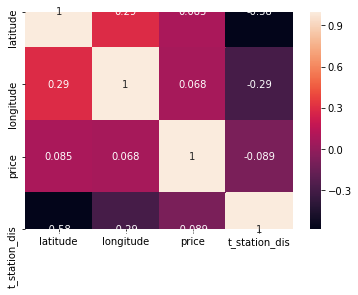

In [322]:
sns.heatmap(df_by_id[['latitude','longitude','price','t_station_dis']].corr(),annot=True);

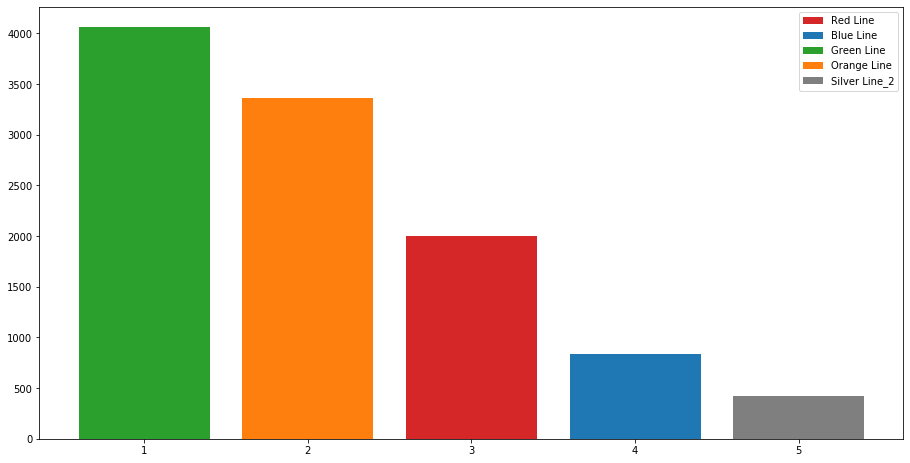

In [59]:
# potentially most traveled subway line by Airbnb guests
fig = plt.figure(figsize=(12,6))
axes = fig.add_axes([0,0,1,1])
axes.bar(3, df_by_id.redline.sum(), label='Red Line',color='tab:red')
axes.bar(4, df_by_id.blueline.sum(), label='Blue Line',color='tab:blue')
axes.bar(1, df_by_id.greenline.sum(), label='Green Line',color='tab:green')
axes.bar(2, df_by_id.orangeline.sum(), label='Orange Line',color='tab:orange')
axes.bar(5, df_by_id.silverline_2.sum(), label='Silver Line_2',color='tab:gray')
axes.legend();

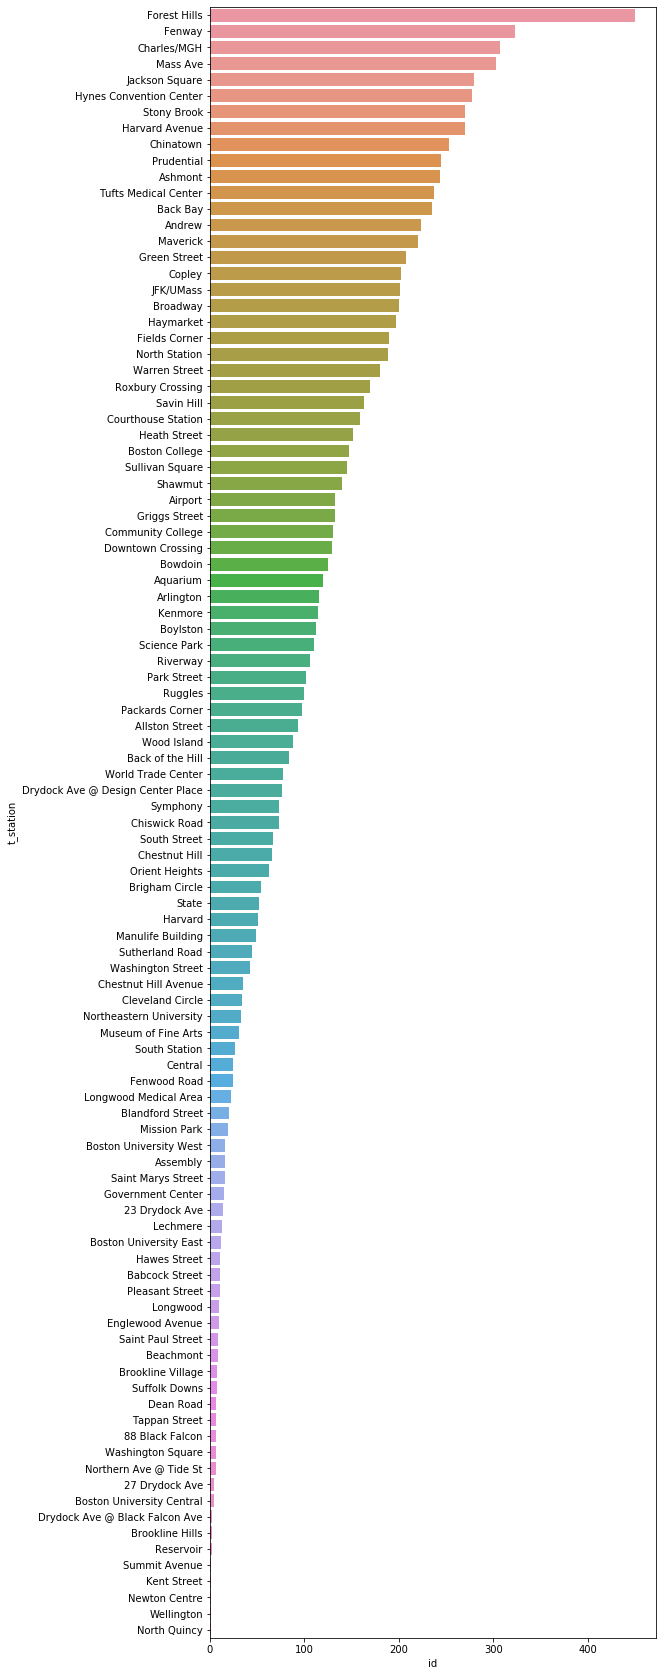

In [60]:
# potentially most traveled t_station by Airbnb guests
df_station = df_by_id.groupby('t_station').id.count().reset_index().sort_values('id',ascending=False)
plt.figure(figsize=(8,30))
sns.barplot(x='id', y='t_station', data=df_station);

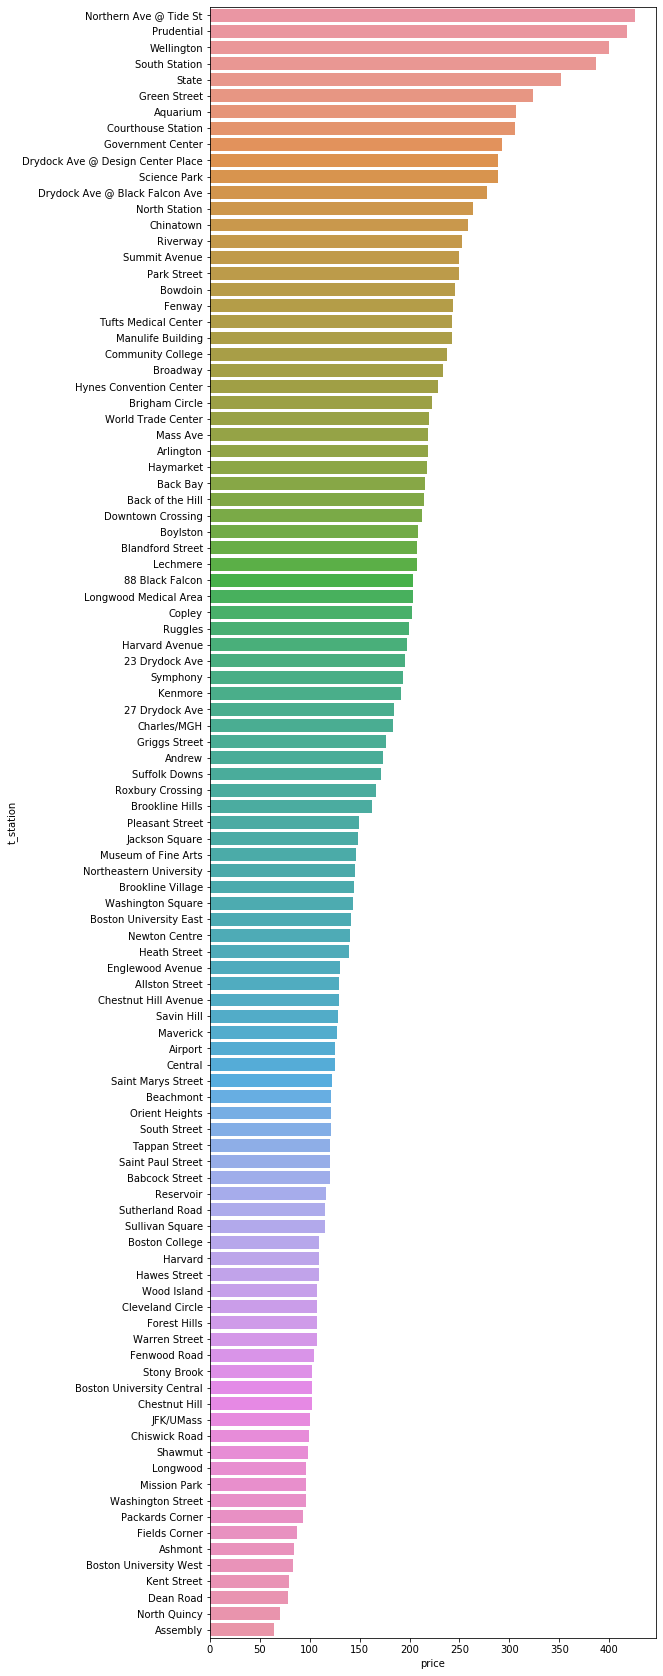

In [61]:
# Avg. price by t_station
df_station= df_by_id.groupby('t_station').price.mean().reset_index().sort_values('price',ascending=False)
plt.figure(figsize=(8,30))
sns.barplot(x='price', y='t_station', data=df_station);

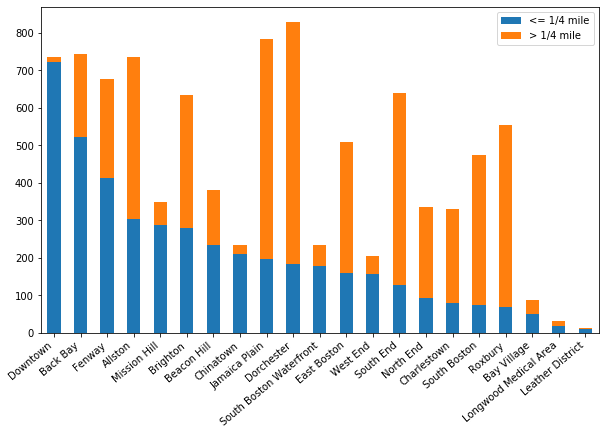

In [225]:
# which neighbourhood has the most listings that are within quarter mile of a t-station
df_quart_mile_neib = pd.DataFrame(df_by_id_nb[df_by_id_nb.t_station_dis<=0.25].neighbourhood.value_counts())
df_quart_mile_neib = df_quart_mile_neib.rename(columns={"neighbourhood": "<= 1/4 mile"})
df_quart_mile_neib['> 1/4 mile'] = df_by_id_nb[df_by_id_nb.t_station_dis>0.25].neighbourhood.value_counts()
ax = df_quart_mile_neib.plot.bar(figsize=(10,6), stacked=True);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

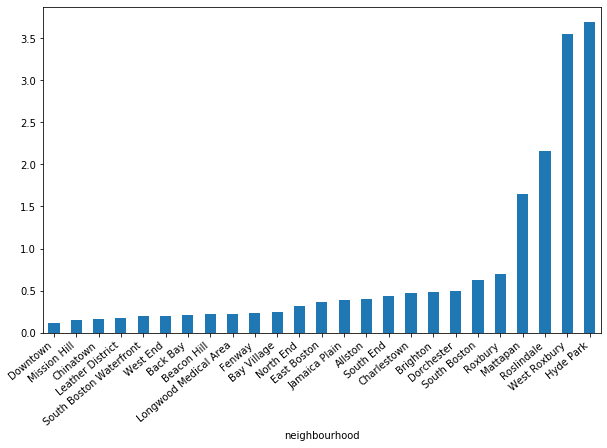

In [63]:
# which neighbourhood listings have the shortest avg. distance to a nearby station
ax = df_by_id_nb.groupby('neighbourhood').t_station_dis.mean().sort_values().plot.bar(figsize=(10,6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

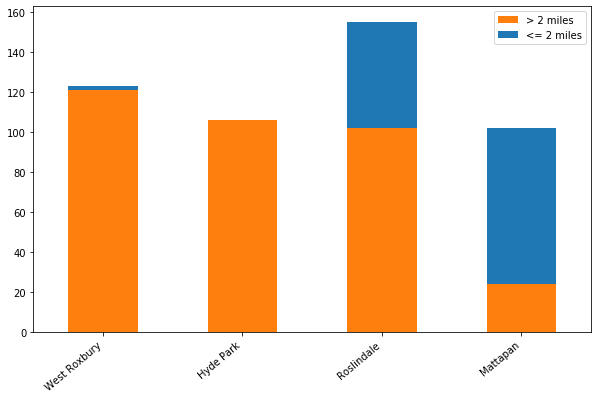

In [232]:
# which neighbourhood has the most listings that are farthur than 2 miles away from a t-station
df_2_mile_neib = pd.DataFrame(df_by_id_nb[df_by_id_nb.t_station_dis>2].neighbourhood.value_counts())
df_2_mile_neib = df_2_mile_neib.rename(columns={"neighbourhood": "> 2 miles"})
df_2_mile_neib['<= 2 miles'] = df_by_id_nb[df_by_id_nb.t_station_dis<=2].neighbourhood.value_counts()
ax = df_2_mile_neib.plot.bar(figsize=(10,6), stacked=True, color=['tab:orange','tab:blue']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

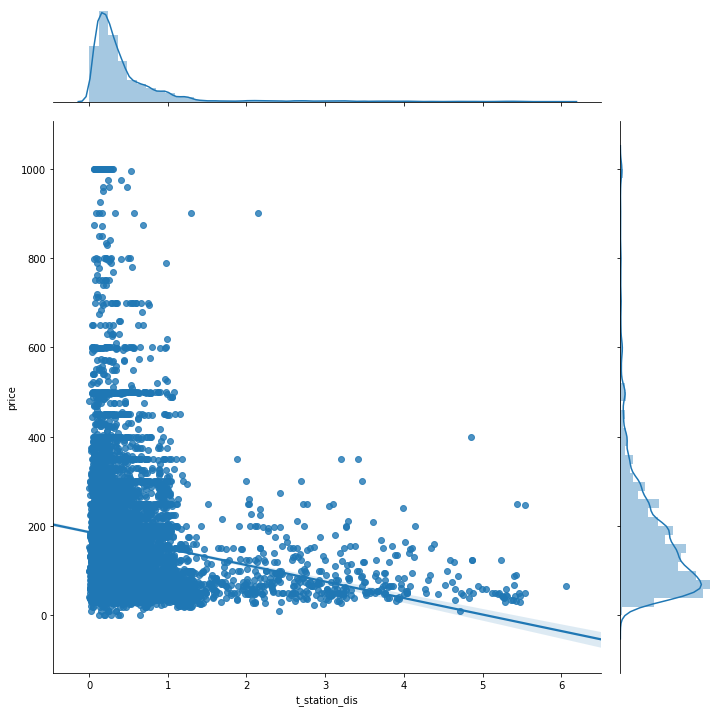

In [237]:
# price and distance to nearby t_station
# distance to a nearby t_station further than 1 mile tend to have lower price
# pricing is more clustered as you go higher in the range
sns.jointplot(y='price', x='t_station_dis',data=df_by_id[df_by_id['price'] < 1000],kind='reg',height=10);

# Area plot???

# SPACE

### room_type

![room_type.png](../img/room_type.png)

![room_type_map.png](../img/room_type_map.png)

In [697]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [696]:
import plotly.graph_objs as go

rt_count = listings.room_type.value_counts()

fig = go.Figure(data=[go.Pie(labels=rt_count.index, values=rt_count.values, hole=.4,title_text="Room Type",title_font_size = 20)])

fig.show()

In [6]:
# import gmaps
# # Read Your Google API key from a local file
# with open('../../GCP_API_Key.txt', 'r') as f:
#     gmaps.configure(api_key=f.read()) 

# # configure a gmaps fig
# figure_layout = {'width':'900px','height': '900px'}
# bos_center = (42.315, -71.04)
# fig = gmaps.figure(layout = figure_layout, center=bos_center, zoom_level=11.25)

# # We can add layers of markers to a Google map using function .symbol_layer()
# # Each marker represents an individual data point
# # Google maps may become very slow if you try to represent more than a few thousand symbols or markers
# Entire_layer = gmaps.symbol_layer(listings[listings.room_type=='Entire home/apt'][['latitude', 'longitude']],
#                                   fill_color='#1f76b4',
#                                   stroke_color='#1f76b4',
#                                   fill_opacity=.5,
#                        stroke_opacity=.5,
#                                   scale=2)

# Private_layer = gmaps.symbol_layer(listings[listings.room_type=='Private room'][['latitude', 'longitude']],
#                                   fill_color='#ff7e0e',
#                                   stroke_color='#ff7e0e',
#                                   fill_opacity=.5,
#                                   stroke_opacity=.5,
#                                   scale=2)

# Shared_layer = gmaps.symbol_layer(listings[listings.room_type=='Shared room'][['latitude', 'longitude']],
#                                   fill_color='#2ca02c',
#                                   stroke_color='#2ca02c',
#                                   fill_opacity=.5,
#                                   stroke_opacity=.5,
#                                   scale=2)

# # add several layers of markers
# fig.add_layer(Entire_layer)
# fig.add_layer(Private_layer)
# fig.add_layer(Shared_layer)
# fig

Figure(layout=FigureLayout(height='900px', width='900px'))

### property_type

![property_type.png](../img/property_type.png)

In [296]:
rt_count = listings.property_type.value_counts()

fig = go.Figure(data=[go.Pie(labels=rt_count.index, values=rt_count.values, hole=.4,title_text="Property Type",title_font_size = 20)])

fig.show()

In [70]:
# Avg square_feet?
listings.square_feet.mean(),listings_filtered.square_feet.mean()

(752.5923076923077, 775.8648648648649)

In [23]:
listings.square_feet.describe()

count     130.000000
mean      752.592308
std       470.077244
min         0.000000
25%       476.250000
50%       580.000000
75%      1000.000000
max      2600.000000
Name: square_feet, dtype: float64

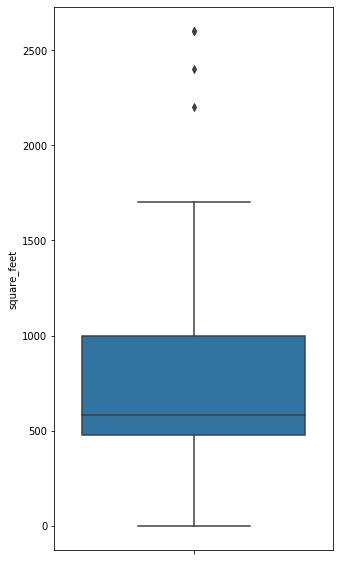

In [24]:
plt.figure(figsize=(5,10))
sns.boxplot(y='square_feet',data=listings);

In [71]:
# Avg bedrooms
listings.bedrooms.mean(),listings_filtered.bedrooms.mean()

(1.34238262535931, 1.3872665088134701)

In [25]:
listings.bedrooms.describe()

count    6262.000000
mean        1.342383
std         0.952969
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        13.000000
Name: bedrooms, dtype: float64

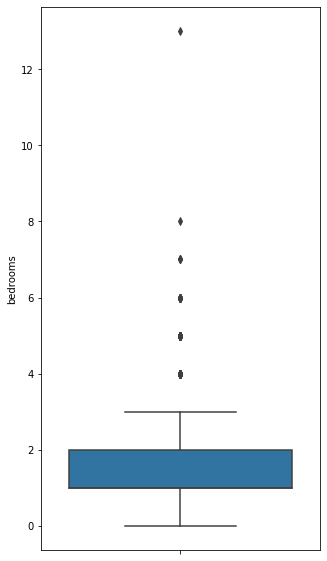

In [26]:
plt.figure(figsize=(5,10))
sns.boxplot(y='bedrooms',data=listings);

In [72]:
# Avg beds
listings.beds.mean(),listings_filtered.beds.mean()

(1.8196040868454662, 1.8932140978432404)

In [27]:
listings.beds.describe()

count    6264.000000
mean        1.819604
std         1.382017
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        24.000000
Name: beds, dtype: float64

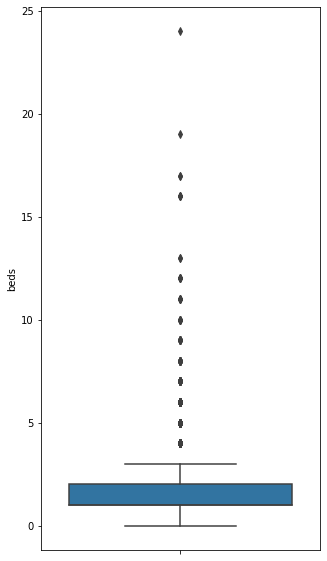

In [28]:
plt.figure(figsize=(5,10))
sns.boxplot(y='beds',data=listings);

In [73]:
# Avg bathrooms
listings.bathrooms.mean(),listings_filtered.bathrooms.mean()

(1.2586647500399297, 1.273157894736842)

In [29]:
listings.bathrooms.describe()

count    6261.000000
mean        1.258665
std         0.501649
min         0.000000
25%         1.000000
50%         1.000000
75%         1.500000
max         6.000000
Name: bathrooms, dtype: float64

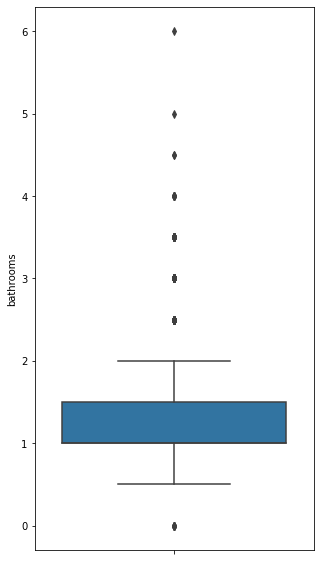

In [30]:
plt.figure(figsize=(5,10))
sns.boxplot(y='bathrooms',data=listings);

# OTHER_DETAILS

### cancellation_policy

![cancellation_policy.png](../img/cancellation_policy.png)

In [698]:
cp_count = listings.cancellation_policy.value_counts()

go.pie.title.Font.size = 50

fig = go.Figure(data=[go.Pie(labels=cp_count.index, values=cp_count.values, hole=.4,title_text="Cancellation Policy",title_font_size = 20)])
fig.show()

### security_deposit

In [261]:
listings.security_deposit = listings.security_deposit.apply(clean_price)
listings.security_deposit.describe()

count    4526.000000
mean      205.656430
std       356.962309
min         0.000000
25%         0.000000
50%       100.000000
75%       300.000000
max      5000.000000
Name: security_deposit, dtype: float64

In [262]:
# percentage of listings which do not require security deposit
listings[listings.security_deposit>0].shape[0] / listings.shape[0]

0.4169859514687101

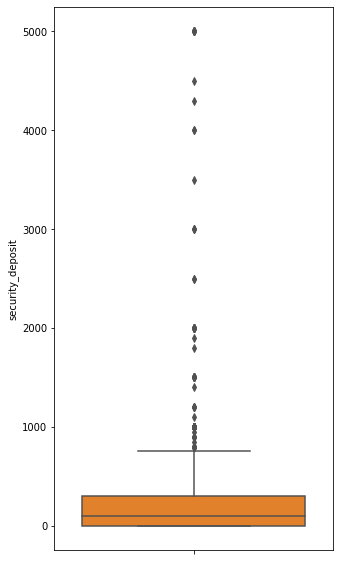

In [263]:
plt.figure(figsize=(5,10))
sns.boxplot(y='security_deposit',data=listings, color='tab:orange')

### cleaning_fee

In [264]:
listings.cleaning_fee = listings.cleaning_fee.apply(clean_price)
listings.cleaning_fee.describe()

count    5298.000000
mean       72.107965
std        49.956565
min         0.000000
25%        30.000000
50%        69.000000
75%       100.000000
max       495.000000
Name: cleaning_fee, dtype: float64

In [266]:
# percentage of listings which do not require security deposit
listings[listings.cleaning_fee>0].shape[0] / listings.shape[0]

0.8073116219667944

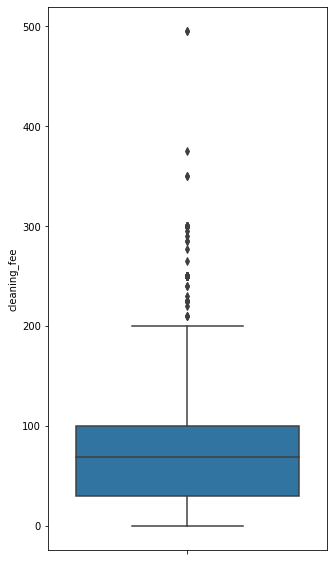

In [267]:
plt.figure(figsize=(5,10))
sns.boxplot(y='cleaning_fee',data=listings);

In [79]:
listings.describe()

id     scrape_id  thumbnail_url  medium_url  xl_picture_url  \
count  6.264000e+03  6.264000e+03            0.0         0.0             0.0   
mean   2.084897e+07  2.019071e+13            NaN         NaN             NaN   
std    9.885939e+06  2.859603e+00            NaN         NaN             NaN   
min    3.781000e+03  2.019071e+13            NaN         NaN             NaN   
25%    1.378730e+07  2.019071e+13            NaN         NaN             NaN   
50%    2.172642e+07  2.019071e+13            NaN         NaN             NaN   
75%    2.903044e+07  2.019071e+13            NaN         NaN             NaN   
max    3.669705e+07  2.019071e+13            NaN         NaN             NaN   

            host_id  host_acceptance_rate  host_listings_count  \
count  6.264000e+03                   0.0          6259.000000   
mean   6.942469e+07                   NaN           135.717047   
std    7.472804e+07                   NaN           319.727516   
min    4.804000e+03                   NaN             0.000000   
25%    1.224305e+07                   NaN             1.000000   
50%    3.405951e+07                   NaN             4.000000   
75%    1.074037e+08                   NaN            33.000000   
max    2.758216e+08                   NaN          1751.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                6259.000000                           0.0  6264.000000   
mean                  135.717047                           NaN    42.339222   
std                   319.727516                           NaN     0.025850   
min                     0.000000                           NaN    42.235760   
25%                     1.000000                           NaN    42.326407   
50%                     4.000000                           NaN    42.345085   
75%                    33.000000                           NaN    42.355463   
max                  1751.000000                           NaN    42.395190   

         longitude  accommodates    bathrooms     bedrooms         beds  \
count  6264.000000   6264.000000  6261.000000  6262.000000  6264.000000   
mean    -71.083164      3.388889     1.258665     1.342383     1.819604   
std       0.033058      2.258649     0.501649     0.952969     1.382017   
min     -71.173510      1.000000     0.000000     0.000000     0.000000   
25%     -71.103855      2.000000     1.000000     1.000000     1.000000   
50%     -71.075625      3.000000     1.000000     1.000000     1.000000   
75%     -71.061117      4.000000     1.500000     2.000000     2.000000   
max     -70.995950     29.000000     6.000000    13.000000    24.000000   

       square_feet         price  security_deposit  cleaning_fee  \
count   130.000000   6264.000000       4526.000000   5298.000000   
mean    752.592308    199.063697        205.656430     72.107965   
std     470.077244    347.696661        356.962309     49.956565   
min       0.000000      0.000000          0.000000      0.000000   
25%     476.250000     80.000000          0.000000     30.000000   
50%     580.000000    149.000000        100.000000     69.000000   
75%    1000.000000    235.000000        300.000000    100.000000   
max    2600.000000  10000.000000       5000.000000    495.000000   

       guests_included  minimum_nights  maximum_nights  \
count      6264.000000     6264.000000    6.264000e+03   
mean          1.715198        5.666826    1.673221e+04   
std           1.402076       20.929425    1.263487e+06   
min           1.000000        1.000000    1.000000e+00   
25%           1.000000        1.000000    9.000000e+01   
50%           1.000000        2.000000    1.125000e+03   
75%           2.000000        3.000000    1.125000e+03   
max          16.000000     1000.000000    1.000000e+08   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
count             6264.000000             6264.000000            6.264000e+03   
mean           

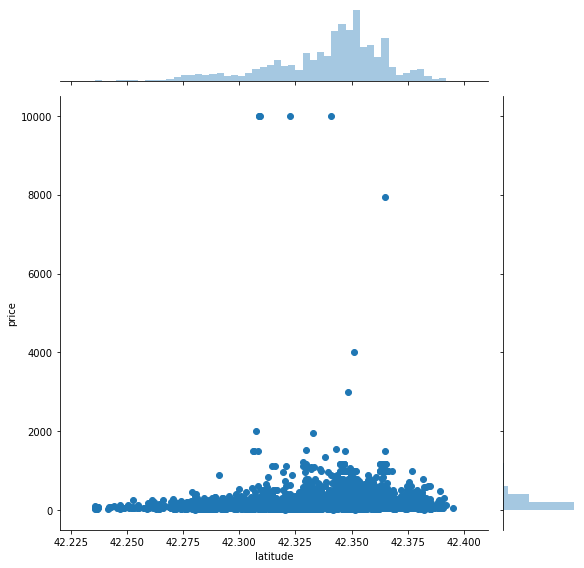

In [80]:
sns.jointplot(y='price', x='latitude',data=listings,kind='scatter',height=8);

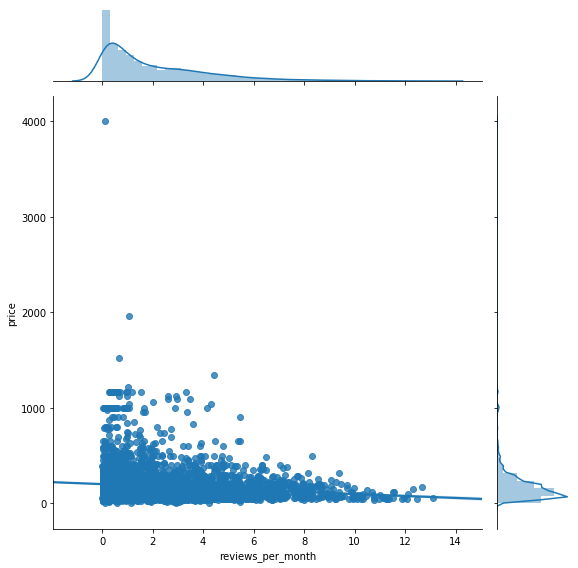

In [81]:
sns.jointplot(y='price', x='reviews_per_month',data=listings,kind='reg',height=8);

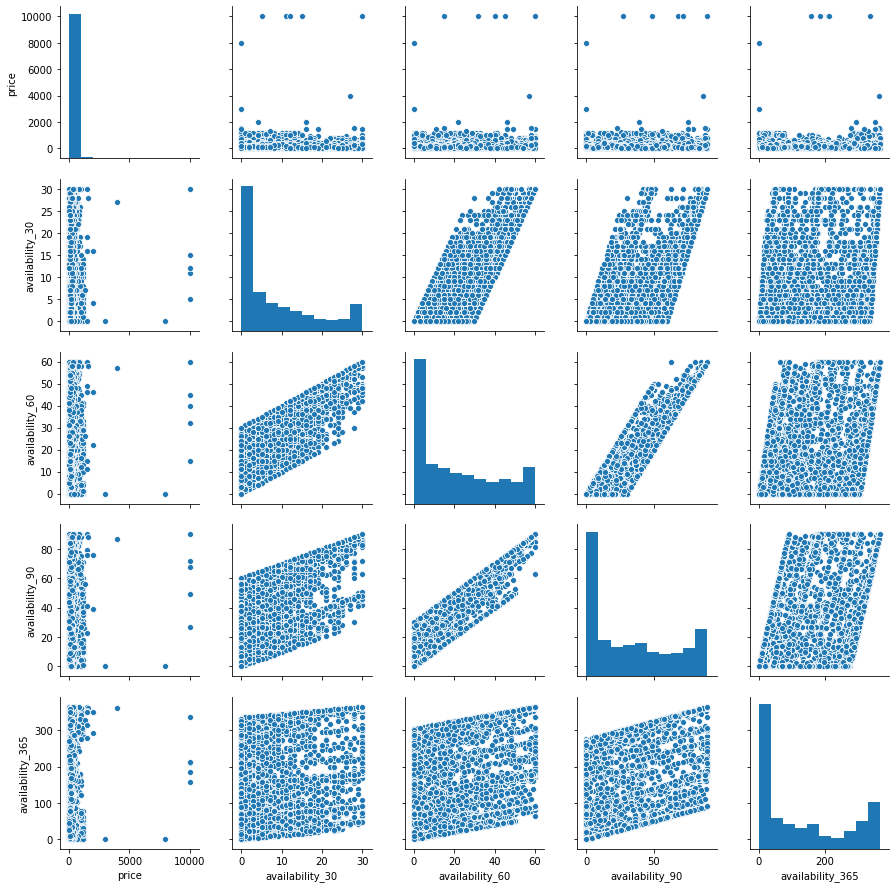

In [82]:
sns.pairplot(listings[['price','availability_30','availability_60','availability_90','availability_365']])

In [83]:
# df = pd.DataFrame(data=[['male','blue'],['male','black'],['female','black'],
#                         ['female',np.nan],[np.nan,'black']],
#                   columns=['gender','eyes'])
# df_dummies = pd.get_dummies(df,drop_first=False)
# df_dummies

# df_dummies = pd.get_dummies(df,drop_first=True)
# df_dummies

In [84]:
# df_dummies = pd.get_dummies(df,drop_first=True)
# df_dummies

### Colormaps

In [85]:
"""
Accent, Accent_r, 
Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, 
CMRmap, CMRmap_r, 
Dark2, Dark2_r, 
GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, 
OrRd, OrRd_r, Oranges, Oranges_r, 
PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, 
PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, 
RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, 
Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, 
Wistia, Wistia_r, 
YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, 
afmhot, afmhot_r, autumn, autumn_r, 
binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, 
cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, 
flag, flag_r, 
gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, 
gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, 
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, 
hot, hot_r, hsv, hsv_r, 
icefire, icefire_r, inferno, inferno_r, 
jet, jet_r, 
magma, magma_r, mako, mako_r, 
nipy_spectral, nipy_spectral_r, 
ocean, ocean_r, 
pink, pink_r, plasma, plasma_r, prism, prism_r, 
rainbow, rainbow_r, rocket, rocket_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, 
tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, 
viridis, viridis_r, vlag, vlag_r, 
winter, winter_r
"""

'\nAccent, Accent_r, \nBlues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, \nCMRmap, CMRmap_r, \nDark2, Dark2_r, \nGnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, \nOrRd, OrRd_r, Oranges, Oranges_r, \nPRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, \nPiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, \nRdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, \nSet1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, \nWistia, Wistia_r, \nYlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, \nafmhot, afmhot_r, autumn, autumn_r, \nbinary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, \ncividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, \nflag, flag_r, \ngist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, \ngist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_